In [1]:
%%time
dataset_name = "W26_only"
df_list = "BES_Panel|BES_reduced_with_na"

%matplotlib inline 
%run BES_header.py {dataset_name} {df_list}

global BES_label_list, BES_df_list

Toggle code

var_type (82, 13)
CPU times: total: 2 s
Wall time: 2.04 s


In [2]:
# ## wide vs long
# # could just take wave == 26 values here and save as "only" dataset
# New_BES = pd.read_stata("E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W26_only\\BES_provisional_long_v26.0.dta")
# New_BES = New_BES[New_BES["wave"]==26]
# New_BES.index = New_BES["id"]
# New_BES = New_BES.drop(New_BES.columns[New_BES.isnull().all(axis=0)],axis=1)

# New_BES["p_housing"] = New_BES["p_housing"].cat.rename_categories(['Own - outright', 'Own - with a mortgage',
#        'Own (part-own) - through shared ownership scheme (i.e. pay part mortgage, part rent)',
#        'Rent - from a private landlord', 'Rent - from my local authority',
#        'Rent - from a housing association',
#        'Neither - I live with my parents, family or friends but pay some rent to them',
#        'Neither - I live rent-free with my parents, family or friends',
#        'Other'])

# New_BES["p_religion"] = New_BES["p_religion"].cat.rename_categories( [                                                                'No, I do not regard myself as belonging to any particular religion',
#                                                                                                'Yes - Church of England/Anglican/Episcopal',
#                                                                                                                      'Yes - Roman Catholic',
#                                                                                                     'Yes - Presbyterian/Church of Scotland',
#                                                                                                                           'Yes - Methodist',
#                                                                                                                             'Yes - Baptist',
#                                                                                                              'Yes - United Reformed Church',
#                                                                                                                   'Yes - Free Presbyterian',
#                                                                                                                           ' Yes - Brethren',
#                                                                                                                             'Yes - Judaism',
#                                                                                                                            'Yes - Hinduism',
#                                                                                                                               'Yes - Islam',
#                                                                                                                             'Yes - Sikhism',
#                                                                                                                            'Yes - Buddhism',
#                                                                                                                               'Yes - Other',
#                                                                                                                         "Prefer not to say",
#                                                                                                                  'Yes - Orthodox Christian',
#        'Yes - Pentecostal (e.g. Assemblies of God, Elim Pentecostal Church, New Testament Church of God, Redeemed Christian Church of God)',
#                                           'Yes - Evangelical - independent/non-denominational (e.g. FIEC, Pioneer, Vineyard, Newfrontiers)'])

# New_BES.to_pickle("E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W26_only\\BES2019_W26_v0.0.zip",compression='zip')


# New_BES_wide = pd.read_stata("E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W26_only\\BES_provisional_wide_v26.0.dta")

In [94]:
logistics_var = ['wave', 'weight',]

pol_pref_var = ['turnoutUKGeneral', 'generalElectionVote',
       'partyIdStrength', 'partyId', 'bestOnMII','likeConLeader', 'likeLabLeader', 'likeLDLeader', 'likePCLeader',
       'likeBrexitLeader', 'likeSNPLeader', 'likeCon', 'likeLab', 'likeLD',
       'likeSNP', 'likePC', 'likeBrexitParty',
       'scotReferendumVote', 'welshReferendumIntention', 'approveUKGovt',
       'approveScotGovt', 'approveWelshGovt',]

party_place_var = ['EUIntegrationCon', 'EUIntegrationLab',
       'EUIntegrationLD', 'EUIntegrationSNP', 'EUIntegrationPC',
        'redistCon', 'redistLab', 'redistLD',
       'redistSNP', 'redistPC',
          'immigCon', 'immigLab', 'immigLD', 'immigSNP', 'immigPC',                       
                  ]

att_var = ['econPersonalRetro',
       'econGenRetro', 'riskPoverty', 'riskUnemployment', 'changeNHS',
       'EUIntegrationSelf', 'immigEcon',
       'euRefVoteAfter', 'redistSelf',  'enviroGrowth', 'trustMPs', 'immigSelf',
        'britishness',
       'scottishness', 'welshness', 'englishness', 'europeanness',
          'dutyToVote2','efficacyNotUnderstand', 'efficacyPolCare',
           'lr_scale', 'al_scale',
       'subjClass',   'small_mii_cat',   'polAttention',       
          ]

# subjClass is this demographic or attitudinal?
demo_var = [ 'speakWelsh',
       'ns_sec_analytic', 'new_pcon',  'age', 'gor', 'pcon',
       'p_work_stat', 'p_gross_household', 'p_housing', 'p_job_sector',
       'p_marital', 'p_disability', 'p_religion', 'p_sexuality', 'p_ethnicity',
       'p_edlevel', 'gender']

In [4]:
logistics_var + pol_pref_var + party_place_var + att_var + demo_var

['wave',
 'weight',
 'turnoutUKGeneral',
 'generalElectionVote',
 'partyIdStrength',
 'partyId',
 'bestOnMII',
 'likeConLeader',
 'likeLabLeader',
 'likeLDLeader',
 'likePCLeader',
 'likeBrexitLeader',
 'likeSNPLeader',
 'likeCon',
 'likeLab',
 'likeLD',
 'likeSNP',
 'likePC',
 'likeBrexitParty',
 'scotReferendumVote',
 'welshReferendumIntention',
 'approveUKGovt',
 'approveScotGovt',
 'approveWelshGovt',
 'EUIntegrationCon',
 'EUIntegrationLab',
 'EUIntegrationLD',
 'EUIntegrationSNP',
 'EUIntegrationPC',
 'redistCon',
 'redistLab',
 'redistLD',
 'redistSNP',
 'redistPC',
 'immigCon',
 'immigLab',
 'immigLD',
 'immigSNP',
 'immigPC',
 'econPersonalRetro',
 'econGenRetro',
 'riskPoverty',
 'riskUnemployment',
 'changeNHS',
 'EUIntegrationSelf',
 'immigEcon',
 'euRefVoteAfter',
 'redistSelf',
 'enviroGrowth',
 'trustMPs',
 'immigSelf',
 'britishness',
 'scottishness',
 'welshness',
 'englishness',
 'europeanness',
 'dutyToVote2',
 'efficacyNotUnderstand',
 'efficacyPolCare',
 'lr_scale'

In [5]:
BES_Panel["generalElectionVote"].value_counts()

generalElectionVote
Labour                                      9442
Don't know                                  5128
Conservative                                4950
Brexit Party/Reform UK                      3012
Liberal Democrat                            2045
I would/did not vote                        1990
Green Party                                 1546
Scottish National Party (SNP)                699
Other                                        573
Plaid Cymru                                  167
United Kingdom Independence Party (UKIP)       0
British National Party (BNP)                   0
Change UK- The Independent Group               0
An independent candidate                       0
Name: count, dtype: int64

In [6]:
search(BES_reduced_with_na,"generalElection")

generalElectionVote_Labour                           23851
generalElectionVote_Conservative                     23851
generalElectionVote_Brexit Party/Reform UK           23851
generalElectionVote_Liberal Democrat                 23851
generalElectionVote_I would/did not vote             23851
generalElectionVote_Green Party                      23851
generalElectionVote_Scottish National Party (SNP)    23851
generalElectionVote_Plaid Cymru                      23851
dtype: int64

Top 20 positive (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 bestOnMII_Brexit Party/Reform UK 
 0.740000 
 0.00 
 19523 
 
 
 partyId_Brexit Party/Reform UK 
 0.590000 
 0.00 
 23310 
 
 
 likeBrexitParty__Strongly like 
 0.590000 
 0.00 
 20148 
 
 
 likeBrexitLeader__Strongly like 
 0.520000 
 0.00 
 11822 
 
 
 small_mii_cat_Immigration 
 0.420000 
 0.00 
 21998 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.410000 
 0.00 
 21070 
 
 
 EUIntegrationSelf__Protect our independence 
 0.400000 
 0.00 
 22680 
 
 
 immigLab__Allow many more 
 0.330000 
 0.00 
 19420 
 
 
 immigLD__Allow many more 
 0.320000 
 0.00 
 16235 
 
 
 immigCon__Allow many more 
 0.290000 
 0.00 
 20310 
 
 
 al_scale__Authoritarian 
 0.280000 
 0.00 
 15724 
 
 
 englishness__Very strongly English 
 0.230000 
 0.00 
 23462 
 
 
 efficacyPolCare__Strongly agree 
 0.190000 
 0.00 
 23327 
 
 
 redistSelf__Government should be less concerned[...] 
 0.180000 
 0.00 
 21910 
 
 
 immigSNP__Allow many more 
 0.170000 
 0.00 
 1987 
 
 
 britishness__Very strongly British 
 0.160000 
 0.00 
 23526 
 
 
 age 
 0.120000 
 0.00 
 23851 
 
 
 likeCon__Strongly like 
 0.120000 
 0.00 
 23317 
 
 
 p_religion_Yes - Church of[...] 
 0.110000 
 0.00 
 23172 
 
 
 partyId_Conservative 
 0.110000 
 0.00 
 23310 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigSelf__Allow many more 
 -0.380000 
 0.00 
 22552 
 
 
 immigEcon__Good for economy 
 -0.370000 
 0.00 
 22661 
 
 
 approveWelshGovt__Strongly approve 
 -0.360000 
 0.00 
 1493 
 
 
 likeLab__Strongly like 
 -0.360000 
 0.00 
 23303 
 
 
 likeLabLeader__Strongly like 
 -0.340000 
 0.00 
 22929 
 
 
 likeLD__Strongly like 
 -0.340000 
 0.00 
 22318 
 
 
 EUIntegrationLab__Protect our independence 
 -0.330000 
 0.00 
 18939 
 
 
 likePC__Strongly like 
 -0.320000 
 0.00 
 1459 
 
 
 likeLDLeader__Strongly like 
 -0.320000 
 0.00 
 16989 
 
 
 generalElectionVote_Labour 
 -0.310000 
 0.00 
 23851 
 
 
 EUIntegrationCon__Protect our independence 
 -0.290000 
 0.00 
 19754 
 
 
 EUIntegrationLD__Protect our independence 
 -0.280000 
 0.00 
 16431 
 
 
 enviroGrowth__Protecting the environment should[...] 
 -0.270000 
 0.00 
 22539 
 
 
 bestOnMII_Labour 
 -0.270000 
 0.00 
 19523 
 
 
 europeanness__Very strongly European 
 -0.260000 
 0.00 
 23160 
 
 
 partyId_Labour 
 -0.240000 
 0.00 
 23310 
 
 
 approveScotGovt__Strongly approve 
 -0.230000 
 0.00 
 2404 
 
 
 likeSNPLeader__Strongly like 
 -0.230000 
 0.00 
 2197 
 
 
 likeSNP__Strongly like 
 -0.220000 
 0.00 
 2405 
 
 
 redistCon__Government should be less concerned[...] 
 -0.210000 
 0.00 
 18680

MSE: 0.03, MAE: 0.06, EV: 0.75, R2: 0.75


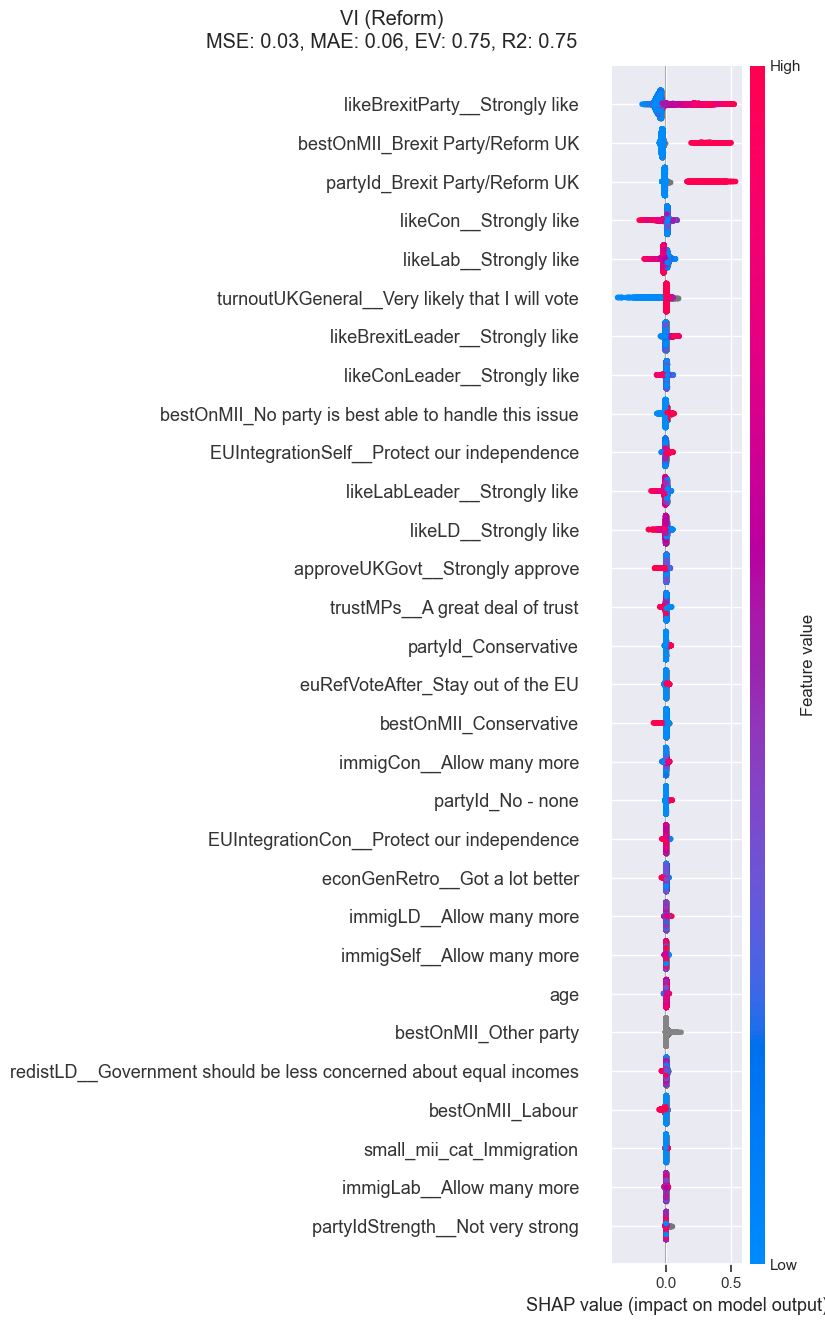

CPU times: total: 1min 3s
Wall time: 11.9 s


In [7]:
%%time
name = "generalElectionVote_Brexit Party/Reform UK"
# BES_reduced_with_na[name] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "VI (Reform)",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote"],
                                                    verbosity=0)

Top 20 positive (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 bestOnMII_Brexit Party/Reform UK 
 0.740000 
 0.00 
 19523 
 
 
 partyId_Brexit Party/Reform UK 
 0.590000 
 0.00 
 23310 
 
 
 likeBrexitParty__Strongly like 
 0.590000 
 0.00 
 20148 
 
 
 likeBrexitLeader__Strongly like 
 0.520000 
 0.00 
 11822 
 
 
 small_mii_cat_Immigration 
 0.420000 
 0.00 
 21998 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.410000 
 0.00 
 21070 
 
 
 EUIntegrationSelf__Protect our independence 
 0.400000 
 0.00 
 22680 
 
 
 immigLab__Allow many more 
 0.330000 
 0.00 
 19420 
 
 
 immigLD__Allow many more 
 0.320000 
 0.00 
 16235 
 
 
 immigCon__Allow many more 
 0.290000 
 0.00 
 20310 
 
 
 al_scale__Authoritarian 
 0.280000 
 0.00 
 15724 
 
 
 englishness__Very strongly English 
 0.230000 
 0.00 
 23462 
 
 
 efficacyPolCare__Strongly agree 
 0.190000 
 0.00 
 23327 
 
 
 redistSelf__Government should be less concerned[...] 
 0.180000 
 0.00 
 21910 
 
 
 immigSNP__Allow many more 
 0.170000 
 0.00 
 1987 
 
 
 britishness__Very strongly British 
 0.160000 
 0.00 
 23526 
 
 
 age 
 0.120000 
 0.00 
 23851 
 
 
 likeCon__Strongly like 
 0.120000 
 0.00 
 23317 
 
 
 p_religion_Yes - Church of[...] 
 0.110000 
 0.00 
 23172 
 
 
 partyId_Conservative 
 0.110000 
 0.00 
 23310 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigSelf__Allow many more 
 -0.380000 
 0.00 
 22552 
 
 
 immigEcon__Good for economy 
 -0.370000 
 0.00 
 22661 
 
 
 approveWelshGovt__Strongly approve 
 -0.360000 
 0.00 
 1493 
 
 
 likeLab__Strongly like 
 -0.360000 
 0.00 
 23303 
 
 
 likeLabLeader__Strongly like 
 -0.340000 
 0.00 
 22929 
 
 
 likeLD__Strongly like 
 -0.340000 
 0.00 
 22318 
 
 
 EUIntegrationLab__Protect our independence 
 -0.330000 
 0.00 
 18939 
 
 
 likePC__Strongly like 
 -0.320000 
 0.00 
 1459 
 
 
 likeLDLeader__Strongly like 
 -0.320000 
 0.00 
 16989 
 
 
 generalElectionVote_Labour 
 -0.310000 
 0.00 
 23851 
 
 
 EUIntegrationCon__Protect our independence 
 -0.290000 
 0.00 
 19754 
 
 
 EUIntegrationLD__Protect our independence 
 -0.280000 
 0.00 
 16431 
 
 
 enviroGrowth__Protecting the environment should[...] 
 -0.270000 
 0.00 
 22539 
 
 
 bestOnMII_Labour 
 -0.270000 
 0.00 
 19523 
 
 
 europeanness__Very strongly European 
 -0.260000 
 0.00 
 23160 
 
 
 partyId_Labour 
 -0.240000 
 0.00 
 23310 
 
 
 approveScotGovt__Strongly approve 
 -0.230000 
 0.00 
 2404 
 
 
 likeSNPLeader__Strongly like 
 -0.230000 
 0.00 
 2197 
 
 
 likeSNP__Strongly like 
 -0.220000 
 0.00 
 2405 
 
 
 redistCon__Government should be less concerned[...] 
 -0.210000 
 0.00 
 18680

MSE: 0.06, MAE: 0.13, EV: 0.44, R2: 0.44


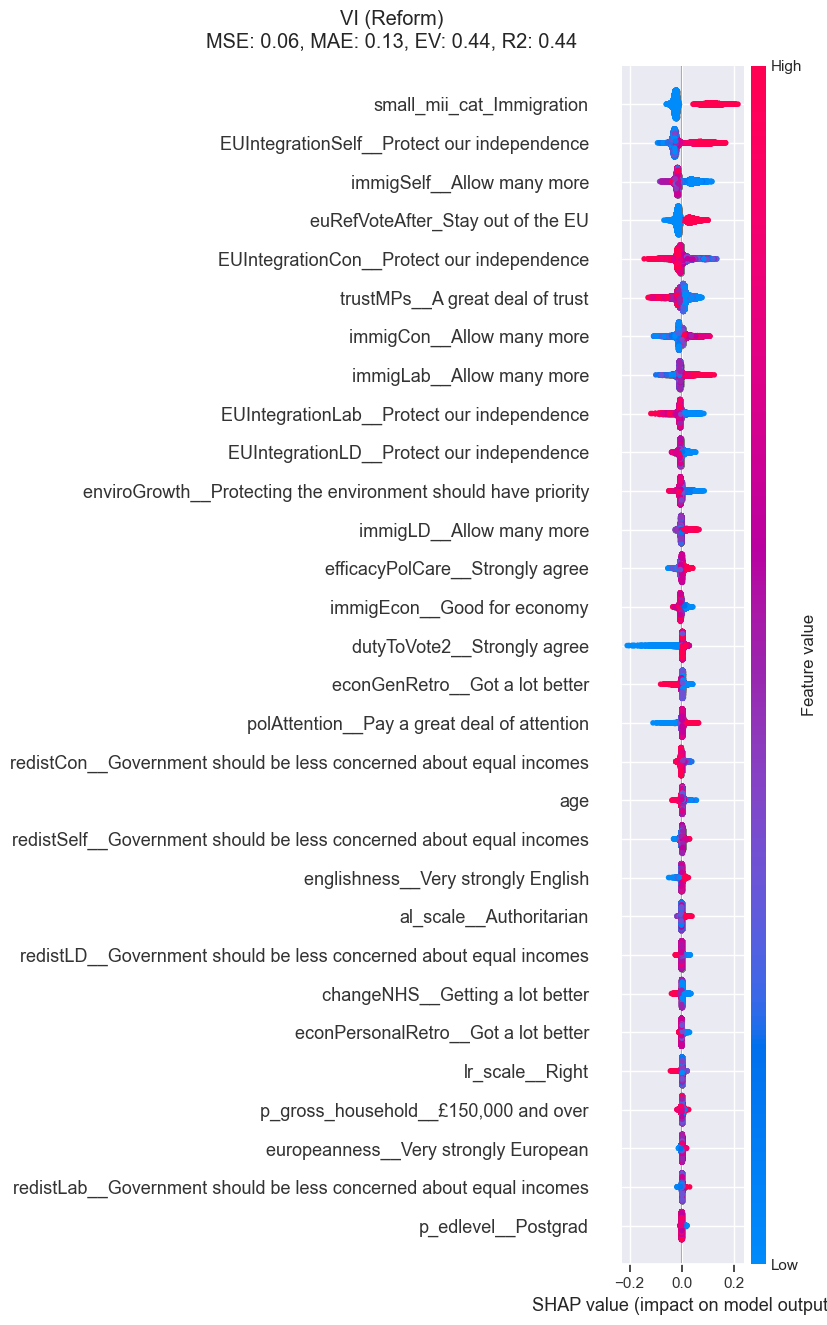

CPU times: total: 46.4 s
Wall time: 10.1 s


In [8]:
%%time
name = "generalElectionVote_Brexit Party/Reform UK"
# BES_reduced_with_na[name] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na, name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "VI (Reform)",dataset=BES_reduced_with_na,
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote","like","bestOn","partyId","approve"],
                                                    verbosity=0)

In [9]:
BES_Panel_W25_comb = pd.read_pickle("E:\\Users\\Gamer\\Documents\\GitHub\\BES_analysis\\BES_analysis_data\\W25_comb\\BES2019_W25_Panel_v25.0.zip")
BES_Panel_W25_comb.index=BES_Panel_W25_comb["id"]

In [10]:
search( BES_Panel_W25_comb , "p_past|generalElectionVoteW25" ).index

Index(['generalElectionVoteW25', 'p_past_vote_2010', 'p_past_vote_2005',
       'p_past_vote_2015', 'p_past_vote_2017', 'p_past_vote_2019'],
      dtype='object')

In [11]:
search( BES_Panel_W25_comb , "p_past|generalElectionVote" ).index[-13:]

Index(['generalElectionVoteW19', 'generalElectionVoteNonVoterW19',
       'generalElectionVoteW20', 'generalElectionVoteW21',
       'generalElectionVoteW22', 'generalElectionVoteW23',
       'generalElectionVoteW24', 'generalElectionVoteW25', 'p_past_vote_2010',
       'p_past_vote_2005', 'p_past_vote_2015', 'p_past_vote_2017',
       'p_past_vote_2019'],
      dtype='object')

In [12]:
BES_Panel.index.max()

115590

In [13]:
BES_Panel_W25_comb.index.max()

113066

In [14]:
index_overlap = list(set(BES_Panel_W25_comb.index).intersection(set(BES_Panel.index)))

In [15]:
len(index_overlap)

27550

In [16]:
len(index_overlap)/BES_Panel.shape[0]

0.915738740235998

In [99]:
search(BES_Panel_W25_comb,"trustMPs").index

Index(['trustMPsW1', 'trustMPsW2', 'trustMPsW3', 'trustMPsW4', 'trustMPsW6',
       'trustMPsW7', 'trustMPsW8', 'trustMPsW9', 'trustMPsW10', 'trustMPsW12',
       'trustMPsW15', 'trustMPsW16', 'trustMPsW17', 'trustMPsW18',
       'trustMPsW19', 'trustMPsW20', 'trustMPsW21', 'trustMPsW23',
       'trustMPsW25'],
      dtype='object')

In [193]:
var_set = ['generalElectionVoteW19', 'generalElectionVoteNonVoterW19',
       'generalElectionVoteW20', 'generalElectionVoteW21',
       'generalElectionVoteW22', 'generalElectionVoteW23',
       'generalElectionVoteW24', 'generalElectionVoteW25', 'p_past_vote_2010', 'p_past_vote_2005',
       'p_past_vote_2015', 'p_past_vote_2017', 'p_past_vote_2019',
          'trustMPsW1', 'trustMPsW2', 'trustMPsW3', 'trustMPsW4', 'trustMPsW6',
       'trustMPsW7', 'trustMPsW8', 'trustMPsW9', 'trustMPsW10', 'trustMPsW12',
       'trustMPsW15', 'trustMPsW16', 'trustMPsW17', 'trustMPsW18', 'trustMPsW19', 'trustMPsW20', 'trustMPsW21', 'trustMPsW23',
       'trustMPsW25']


BES_Panel.loc[index_overlap,var_set] = BES_Panel_W25_comb.loc[index_overlap,var_set]

In [102]:
trustMPsW19 = BES_Panel["trustMPsW19"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
trustMPsW26 = BES_Panel["trustMPs"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)

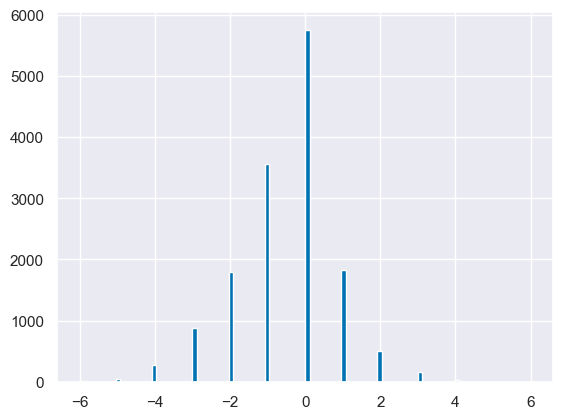

In [104]:
(trustMPsW26-trustMPsW19).hist(bins=100);

In [121]:
(trustMPsW26-trustMPsW19).notnull().sum()

14833

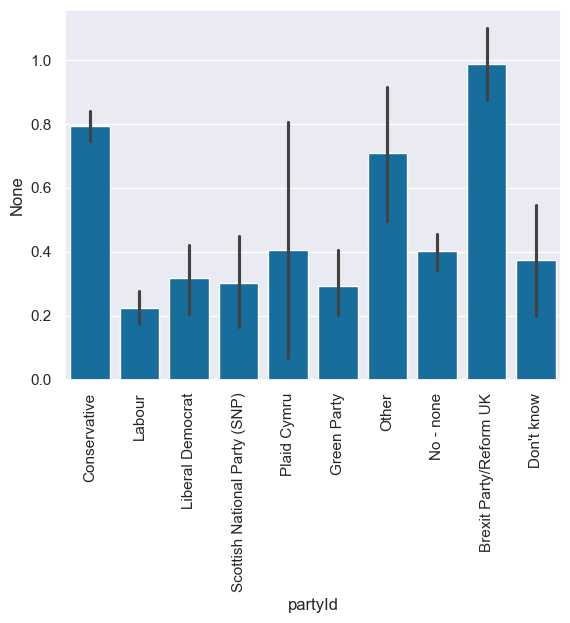

In [114]:
sns.barplot(y=trustMPsW19-trustMPsW26,x=BES_Panel["partyId"].cat.remove_unused_categories(),weights=BES_Panel["weight"]);
plt.xticks(rotation=90);

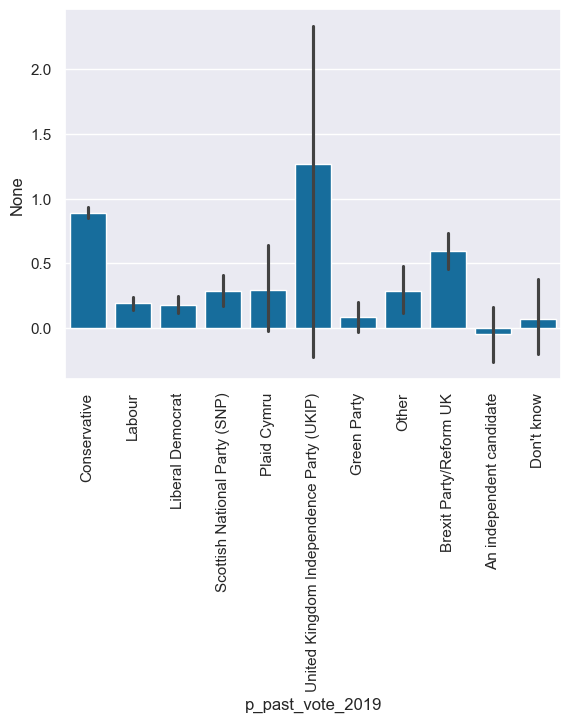

In [117]:
sns.barplot(y=trustMPsW19-trustMPsW26,x=BES_Panel["p_past_vote_2019"].cat.remove_unused_categories(),weights=BES_Panel["weight"]);
plt.xticks(rotation=90);

In [ ]:
trustMPsW17    14934
trustMPsW18    16631
trustMPsW19    15619
trustMPsW20    13772
trustMPsW21    15362
trustMPsW23    18068
trustMPsW25    19942

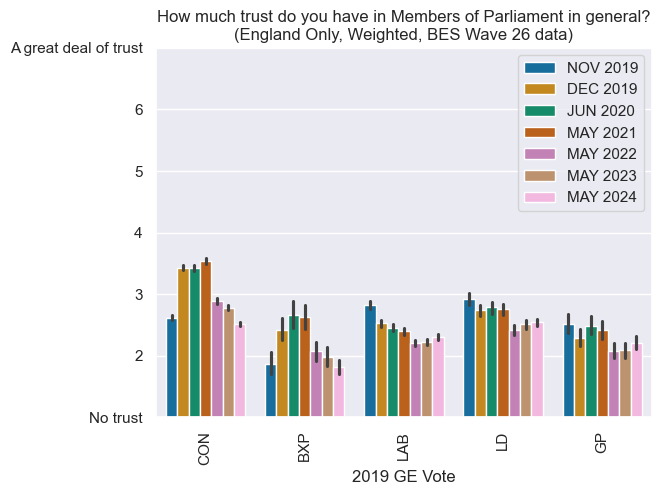

In [246]:
df = BES_Panel[ ['trustMPsW17','trustMPsW19','trustMPsW20','trustMPsW21','trustMPsW23','trustMPsW25','trustMPs', 'p_past_vote_2019', 'partyId', 'weight']][England]
df.columns = ['trustMPsW17','trustMPsW19','trustMPsW20','trustMPsW21','trustMPsW23','trustMPsW25','trustMPsW26', 'p_past_vote_2019', 'partyId', 'weight']
df = df.melt(id_vars = ["p_past_vote_2019","partyId","weight"])
df["value"] = df["value"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
df["p_past_vote_2019"] = df["p_past_vote_2019"]\
    .replace("Don't know",np.nan)\
    .replace("An independent candidate",np.nan)\
    .replace("Other",np.nan)\
    .replace('United Kingdom Independence Party (UKIP)',np.nan)\
    .replace('Brexit Party/Reform UK',"BXP")\
    .replace('Conservative',"CON")\
    .replace('Labour',"LAB")\
    .replace('Liberal Democrat',"LD")\
    .replace('Green Party',"GP").cat.remove_unused_categories()
df["variable"] = df["variable"].replace("trustMPsW19","DEC 2019").replace("trustMPsW26","MAY 2024")\
    .replace("trustMPsW17","NOV 2019").replace("trustMPsW25","MAY 2023")\
    .replace("trustMPsW20","JUN 2020").replace("trustMPsW21","MAY 2021")\
    .replace("trustMPsW22","NOV 2021").replace("trustMPsW23","MAY 2022")\

df =df.rename(columns = {"variable":""})

sns.barplot(data=df,x="p_past_vote_2019",y="value",hue="",weights="weight",
           order = ["CON","BXP","LAB","LD","GP"]);
plt.xticks(rotation=90);
plt.ylim([0,6]);
plt.title("How much trust do you have in Members of Parliament in general?\n(England Only, Weighted, BES Wave 26 data)");
plt.yticks(np.arange(7),list(BES_Panel["trustMPs"].replace("Don't know",np.nan).cat.remove_unused_categories().cat.categories));
plt.ylabel("");
plt.xlabel("2019 GE Vote");

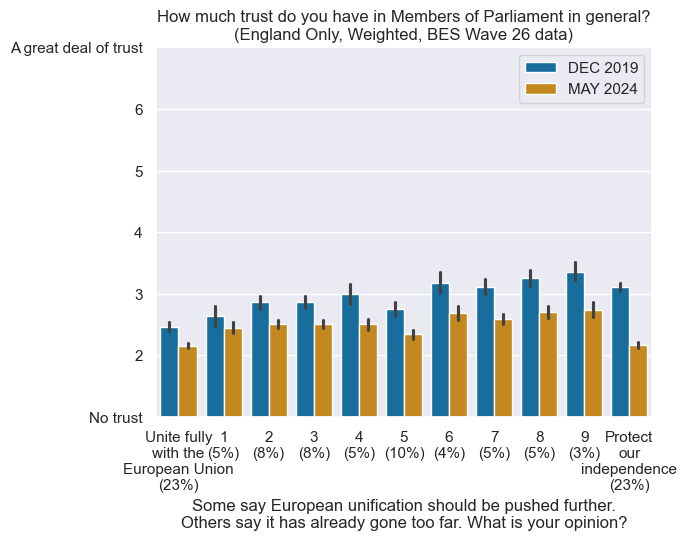

In [237]:
df = BES_Panel[ ["trustMPsW19","trustMPs","p_past_vote_2019","partyId","weight","EUIntegrationSelf"]][England]
df.columns = ['trustMPsW19', 'trustMPsW26', 'p_past_vote_2019', 'partyId', 'weight',"EUIntegrationSelf"]
df = df.melt(id_vars = ["p_past_vote_2019","partyId","weight","EUIntegrationSelf"])
df["value"] = df["value"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
# df["p_past_vote_2019"] = df["p_past_vote_2019"]\
#     .replace("Don't know",np.nan)\
#     .replace("An independent candidate",np.nan)\
#     .replace("Other",np.nan)\
#     .replace('United Kingdom Independence Party (UKIP)',np.nan)\
#     .replace('Brexit Party/Reform UK',"BXP")\
#     .replace('Conservative',"CON")\
#     .replace('Labour',"LAB")\
#     .replace('Liberal Democrat',"LD")\
#     .replace('Green Party',"GP").cat.remove_unused_categories()
df["EUIntegrationSelf"] = df["EUIntegrationSelf"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
df["variable"] = df["variable"].replace("trustMPsW19","DEC 2019").replace("trustMPsW26","MAY 2024")
df =df.rename(columns = {"variable":""})

sns.barplot(data=df,x="EUIntegrationSelf",y="value",hue="",weights="weight")
#            order = ["CON","BXP","LAB","LD","GP"]);
x_perc = round(pd.crosstab(BES_Panel["EUIntegrationSelf"].replace("Don't know",np.nan),
            BES_Panel["EUIntegrationSelf"].replace("Don't know",np.nan),
            values=BES_Panel["weight"],aggfunc=sum,normalize='all',margins=True).drop("All")["All"]*100).astype(int)
x_labels = ['Unite fully\nwith the\nEuropean Union',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'Protect\nour\nindependence']
x_labels = [ x_labels[x]+"\n("+str(x_perc[x])+"%)" for x in range(len(x_labels)) ]
plt.xticks(np.arange(11),x_labels, rotation=0,);
plt.ylim([0,6]);
plt.title("How much trust do you have in Members of Parliament in general?\n(England Only, Weighted, BES Wave 26 data)");
plt.yticks(np.arange(7),list(BES_Panel["trustMPs"].replace("Don't know",np.nan).cat.remove_unused_categories().cat.categories));
plt.ylabel("");
plt.xlabel("Some say European unification should be pushed further.\nOthers say it has already gone too far. What is your opinion?");

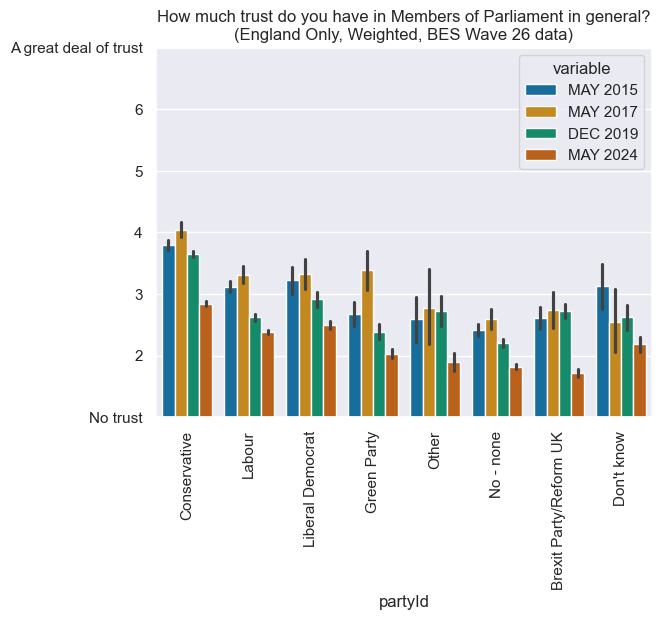

In [235]:
df = BES_Panel[ [ "trustMPsW6","trustMPsW12","trustMPsW19","trustMPs","generalElectionVote","partyId","weight"]][England]
df.columns = [ "trustMPsW6","trustMPsW12",'trustMPsW19', 'trustMPsW26', 'generalElectionVote', 'partyId', 'weight']
df = df.melt(id_vars = ["generalElectionVote","partyId","weight"])
df["value"] = df["value"].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
df["partyId"] = df["partyId"].cat.remove_unused_categories()
df["generalElectionVote"] = df["generalElectionVote"]\
    .replace("Don't know",np.nan)\
    .replace("An independent candidate",np.nan)\
    .replace("Other",np.nan)\
    .replace('United Kingdom Independence Party (UKIP)',np.nan)\
    .replace('Brexit Party/Reform UK',"BXP")\
    .replace('Conservative',"CON")\
    .replace('Labour',"LAB")\
    .replace('Liberal Democrat',"LD")\
    .replace('Green Party',"GP").cat.remove_unused_categories()
df["variable"] = df["variable"]\
    .replace("trustMPsW19","DEC 2019").replace("trustMPsW26","MAY 2024")\
    .replace("trustMPsW6","MAY 2015").replace("trustMPsW12","MAY 2017")

sns.barplot(data=df,x="partyId",y="value",hue="variable",weights="weight",);
#            order = ["CON","BXP","LAB","LD","GP"]);
plt.xticks(rotation=90);
plt.ylim([0,6]);
plt.title("How much trust do you have in Members of Parliament in general?\n(England Only, Weighted, BES Wave 26 data)");
plt.yticks(np.arange(7),list(BES_Panel["trustMPs"].replace("Don't know",np.nan).cat.remove_unused_categories().cat.categories));
plt.ylabel("");

In [243]:
search(BES_Panel,"trustMPs").sort_index()

trustMPs       30064
trustMPsW1      7581
trustMPsW10    10824
trustMPsW12     3084
trustMPsW15     3293
trustMPsW16     3839
trustMPsW17    14934
trustMPsW18    16631
trustMPsW19    15619
trustMPsW2      7957
trustMPsW20    13772
trustMPsW21    15362
trustMPsW23    18068
trustMPsW25    19942
trustMPsW3      7801
trustMPsW4      8928
trustMPsW6      8910
trustMPsW7     10012
trustMPsW8      1330
trustMPsW9     10711
dtype: int64

In [137]:
search(BES_Panel_W25_comb,"trustMPs")

trustMPsW1     30566
trustMPsW2     30893
trustMPsW3     27827
trustMPsW4     31548
trustMPsW6     30257
trustMPsW7     30895
trustMPsW8      4024
trustMPsW9     30036
trustMPsW10    30237
trustMPsW12     8515
trustMPsW15     7688
trustMPsW16     9539
trustMPsW17    34366
trustMPsW18    37825
trustMPsW19    32177
trustMPsW20    31468
trustMPsW21    30281
trustMPsW23    30949
trustMPsW25    30407
dtype: int64

In [131]:
BES_Panel_W25_comb[search(BES_Panel_W25_comb,"trustMPs").index].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).mean()

trustMPsW1     2.090544
trustMPsW2     2.080784
trustMPsW3     2.114588
trustMPsW4     2.205192
trustMPsW6     2.377199
trustMPsW7     1.995659
trustMPsW8     2.308764
trustMPsW9     2.101140
trustMPsW10    2.238656
trustMPsW12    2.475070
trustMPsW15    1.321232
trustMPsW16    1.576148
trustMPsW17    1.715725
trustMPsW18    1.800868
trustMPsW19    1.993298
trustMPsW20    1.940590
trustMPsW21    1.978652
trustMPsW23    1.525162
trustMPsW25    1.553973
dtype: float64

In [ ]:
# try to have a look at the transition between W12 and W15 (hmm - low sample waves!)
# 19 is a high point - only def starts to drop at W23 after W21
# other high points - after 2015 GE, during 2016 euref, before 2017 GE

# trustMPsW6
# trustMPsW10

In [105]:
trust_diff_corrs= BES_reduced_with_na.corrwith((trustMPsW26-trustMPsW19))

In [118]:
BES_reduced_with_na["trustMPsW19_W26"] = trustMPsW26-trustMPsW19

In [263]:
# BES_reduced_with_na.drop("trustMPsW21_W22",axis=1,inplace=True)

In [247]:
# BES_reduced_with_na["trustMPsW21_W22"] = BES_Panel[["trustMPsW21"]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).diff(axis=0)

In [266]:
BES_reduced_with_na["trustMPsW21_W23"] = -BES_Panel[["trustMPsW21","trustMPsW23"]].apply(lambda x: x.replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)).diff(axis=1)["trustMPsW23"]

In [249]:
BES_reduced_with_na["trustMPsW21_W22"].describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: trustMPsW21_W22, dtype: float64

In [109]:
trust_diff_corrs.sort_values().tail(50)

small_mii_cat_Austerity/spending                                                 0.026260
small_mii_cat_Health                                                             0.026702
generalElectionVote_Scottish National Party (SNP)                                0.027581
bestOnMII_Liberal Democrat                                                       0.028156
gor_Scotland                                                                     0.030719
p_work_stat_Working full time (30 or more hours per week)                        0.031523
p_gross_household__£150,000 and over                                             0.031837
turnoutUKGeneral__Very likely that I will vote                                   0.032424
redistLab__Government should be less concerned about equal incomes               0.033709
small_mii_cat_Europe                                                             0.036154
partyId_Green Party                                                              0.036375
p_marital_

Top 20 positive (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 bestOnMII_Brexit Party/Reform UK 
 0.700000 
 0.00 
 6756 
 
 
 likeBrexitParty__Strongly like 
 0.640000 
 0.00 
 6882 
 
 
 partyId_Brexit Party/Reform UK 
 0.520000 
 0.00 
 7804 
 
 
 likeBrexitLeader__Strongly like 
 0.510000 
 0.00 
 4299 
 
 
 efficacyPolCare__Strongly agree 
 0.320000 
 0.00 
 7813 
 
 
 small_mii_cat_Immigration 
 0.310000 
 0.00 
 7484 
 
 
 EUIntegrationSelf__Protect our independence 
 0.310000 
 0.00 
 7717 
 
 
 immigLD__Allow many more 
 0.270000 
 0.00 
 5759 
 
 
 immigLab__Allow many more 
 0.270000 
 0.00 
 6804 
 
 
 immigCon__Allow many more 
 0.270000 
 0.00 
 7015 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.220000 
 0.00 
 7280 
 
 
 al_scale__Authoritarian 
 0.140000 
 0.00 
 5578 
 
 
 englishness__Very strongly English 
 0.120000 
 0.00 
 7873 
 
 
 polAttention__Pay a great deal of attention 
 0.120000 
 0.00 
 7924 
 
 
 riskPoverty__Very likely 
 0.080000 
 0.00 
 7701 
 
 
 subjClass_Yes, working class 
 0.080000 
 0.00 
 7644 
 
 
 riskUnemployment__Very likely 
 0.050000 
 0.00 
 7306 
 
 
 p_sexuality_Bisexual 
 0.040000 
 0.00 
 7725 
 
 
 redistSelf__Government should be less concerned[...] 
 0.040000 
 0.00 
 7405 
 
 
 p_housing_Rent - from a housing association 
 0.040000 
 0.00 
 7851 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 generalElectionVote_Conservative 
 -0.610000 
 0.00 
 7934 
 
 
 bestOnMII_Conservative 
 -0.390000 
 0.00 
 6756 
 
 
 likeConLeader__Strongly like 
 -0.380000 
 0.00 
 7858 
 
 
 approveUKGovt__Strongly approve 
 -0.380000 
 0.00 
 7843 
 
 
 trustMPs__A great deal of trust 
 -0.350000 
 0.00 
 7834 
 
 
 likeCon__Strongly like 
 -0.340000 
 0.00 
 7868 
 
 
 likeLD__Strongly like 
 -0.320000 
 0.00 
 7656 
 
 
 immigSelf__Allow many more 
 -0.320000 
 0.00 
 7765 
 
 
 immigEcon__Good for economy 
 -0.310000 
 0.00 
 7703 
 
 
 EUIntegrationLab__Protect our independence 
 -0.290000 
 0.00 
 6591 
 
 
 EUIntegrationCon__Protect our independence 
 -0.280000 
 0.00 
 6906 
 
 
 likeLDLeader__Strongly like 
 -0.280000 
 0.00 
 6267 
 
 
 EUIntegrationLD__Protect our independence 
 -0.270000 
 0.00 
 5843 
 
 
 likeLabLeader__Strongly like 
 -0.250000 
 0.00 
 7838 
 
 
 likeLab__Strongly like 
 -0.250000 
 0.00 
 7870 
 
 
 generalElectionVote_Labour 
 -0.230000 
 0.00 
 7934 
 
 
 partyId_Conservative 
 -0.230000 
 0.00 
 7804 
 
 
 small_mii_cat_Economy 
 -0.200000 
 0.00 
 7484 
 
 
 likeSNPLeader__Strongly like 
 -0.190000 
 0.00 
 521 
 
 
 enviroGrowth__Protecting the environment should[...] 
 -0.190000 
 0.00 
 7630

MSE: 0.12, MAE: 0.25, EV: 0.38, R2: 0.38


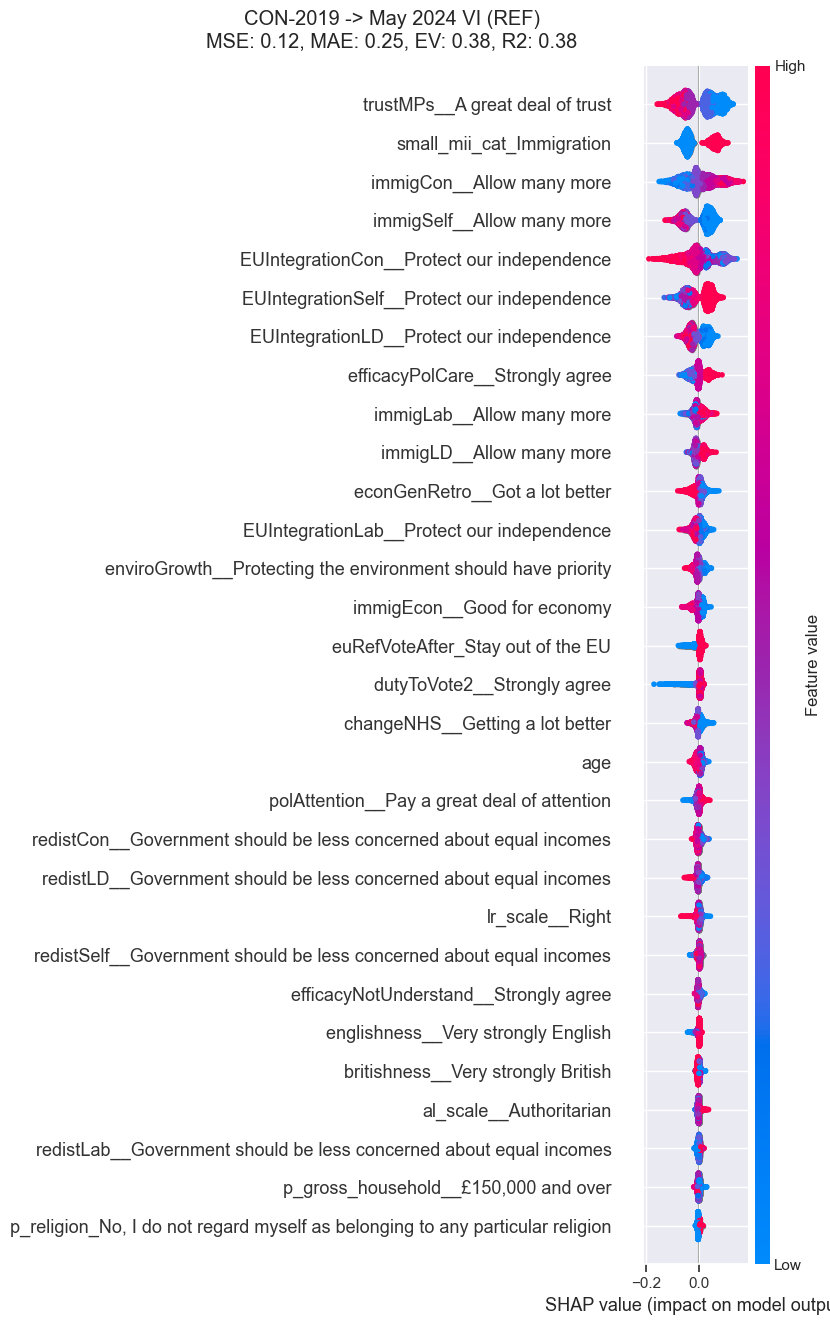

CPU times: total: 17.5 s
Wall time: 3.95 s


In [241]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name = "generalElectionVote_Brexit Party/Reform UK"
# BES_reduced_with_na[name] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "CON-2019 -> May 2024 VI (REF)",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote","like","bestOn","partyId","approve","p_past_vote"],
                                                    verbosity=0)

Top 20 positive (spearman) correlations for generalElectionVote_Conservative 
 
 
   
 r 
 p 
 N 
 
 
 
 
 likeCon__Strongly like 
 0.690000 
 0.00 
 7868 
 
 
 approveUKGovt__Strongly approve 
 0.620000 
 0.00 
 7843 
 
 
 likeConLeader__Strongly like 
 0.610000 
 0.00 
 7858 
 
 
 bestOnMII_Conservative 
 0.610000 
 0.00 
 6756 
 
 
 partyId_Conservative 
 0.530000 
 0.00 
 7804 
 
 
 trustMPs__A great deal of trust 
 0.460000 
 0.00 
 7834 
 
 
 lr_scale__Right 
 0.350000 
 0.00 
 5551 
 
 
 econGenRetro__Got a lot better 
 0.320000 
 0.00 
 7746 
 
 
 EUIntegrationCon__Protect our independence 
 0.300000 
 0.00 
 6906 
 
 
 changeNHS__Getting a lot better 
 0.270000 
 0.00 
 7829 
 
 
 turnoutUKGeneral__Very likely that I will vote 
 0.200000 
 0.00 
 7895 
 
 
 econPersonalRetro__Got a lot better 
 0.180000 
 0.00 
 7892 
 
 
 age 
 0.170000 
 0.00 
 7934 
 
 
 redistSelf__Government should be less concerned[...] 
 0.170000 
 0.00 
 7405 
 
 
 subjClass_Yes, middle class 
 0.150000 
 0.00 
 7644 
 
 
 immigEcon__Good for economy 
 0.140000 
 0.00 
 7703 
 
 
 immigSelf__Allow many more 
 0.140000 
 0.00 
 7765 
 
 
 p_work_stat_Retired 
 0.120000 
 0.00 
 7824 
 
 
 dutyToVote2__Strongly agree 
 0.120000 
 0.00 
 7843 
 
 
 p_housing_Own - outright 
 0.110000 
 0.00 
 7851 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Conservative 
 
 
   
 r 
 p 
 N 
 
 
 
 
 generalElectionVote_Brexit Party/Reform UK 
 -0.610000 
 0.00 
 7934 
 
 
 bestOnMII_Brexit Party/Reform UK 
 -0.450000 
 0.00 
 6756 
 
 
 efficacyPolCare__Strongly agree 
 -0.400000 
 0.00 
 7813 
 
 
 generalElectionVote_Labour 
 -0.380000 
 0.00 
 7934 
 
 
 partyId_Brexit Party/Reform UK 
 -0.320000 
 0.00 
 7804 
 
 
 likeBrexitParty__Strongly like 
 -0.310000 
 0.00 
 6882 
 
 
 likeBrexitLeader__Strongly like 
 -0.290000 
 0.00 
 4299 
 
 
 bestOnMII_Labour 
 -0.260000 
 0.00 
 6756 
 
 
 generalElectionVote_I would/did not vote 
 -0.230000 
 0.00 
 7934 
 
 
 partyId_Labour 
 -0.230000 
 0.00 
 7804 
 
 
 partyId_No - none 
 -0.210000 
 0.00 
 7804 
 
 
 immigCon__Allow many more 
 -0.200000 
 0.00 
 7015 
 
 
 generalElectionVote_Liberal Democrat 
 -0.200000 
 0.00 
 7934 
 
 
 riskPoverty__Very likely 
 -0.160000 
 0.00 
 7701 
 
 
 likeLab__Strongly like 
 -0.140000 
 0.00 
 7870 
 
 
 p_religion_No, I do not regard myself as belonging[...] 
 -0.130000 
 0.00 
 7792 
 
 
 riskUnemployment__Very likely 
 -0.130000 
 0.00 
 7306 
 
 
 generalElectionVote_Green Party 
 -0.130000 
 0.00 
 7934 
 
 
 subjClass_Yes, working class 
 -0.130000 
 0.00 
 7644 
 
 
 scotReferendumVote__Would not vote 
 -0.120000 
 0.01 
 537

MSE: 0.15, MAE: 0.32, EV: 0.39, R2: 0.39


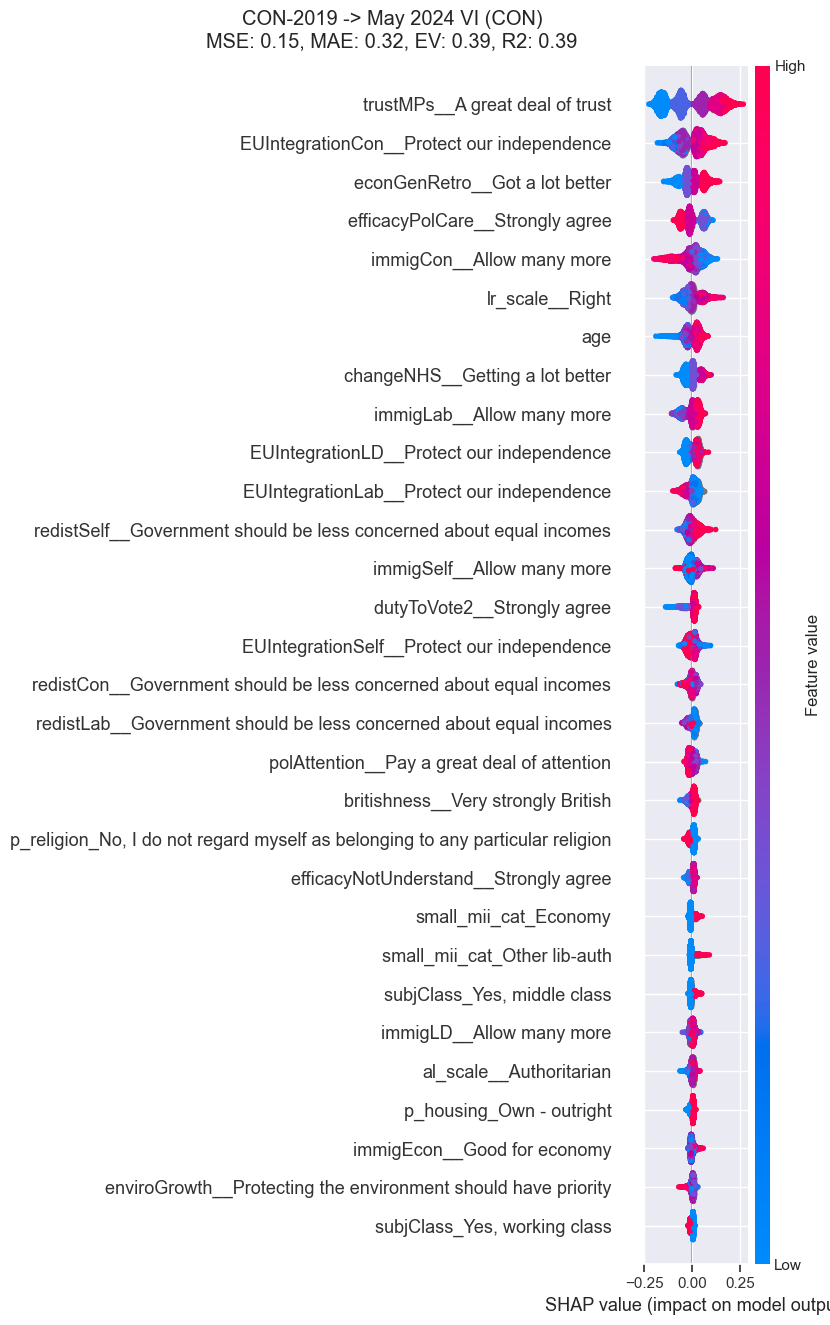

CPU times: total: 27.5 s
Wall time: 5.21 s


In [21]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name = "generalElectionVote_Conservative"
# BES_reduced_with_na[name] = Acq_df[name+"_acq"]

# BES_num[name] = BES_Panel[name].replace("Don't know",np.nan).cat.codes.replace(-1,np.nan).loc[BES_num.index]
df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "CON-2019 -> May 2024 VI (CON)",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote","like","bestOn","partyId","approve","p_past_vote"],
                                                    verbosity=0)

Top 20 positive (spearman) correlations for generalElectionVote_Conservative 
 
 
   
 r 
 p 
 N 
 
 
 
 
 likeCon__Strongly like 
 0.690000 
 0.00 
 7868 
 
 
 approveUKGovt__Strongly approve 
 0.620000 
 0.00 
 7843 
 
 
 likeConLeader__Strongly like 
 0.610000 
 0.00 
 7858 
 
 
 bestOnMII_Conservative 
 0.610000 
 0.00 
 6756 
 
 
 partyId_Conservative 
 0.530000 
 0.00 
 7804 
 
 
 trustMPs__A great deal of trust 
 0.460000 
 0.00 
 7834 
 
 
 lr_scale__Right 
 0.350000 
 0.00 
 5551 
 
 
 econGenRetro__Got a lot better 
 0.320000 
 0.00 
 7746 
 
 
 EUIntegrationCon__Protect our independence 
 0.300000 
 0.00 
 6906 
 
 
 changeNHS__Getting a lot better 
 0.270000 
 0.00 
 7829 
 
 
 turnoutUKGeneral__Very likely that I will vote 
 0.200000 
 0.00 
 7895 
 
 
 econPersonalRetro__Got a lot better 
 0.180000 
 0.00 
 7892 
 
 
 age 
 0.170000 
 0.00 
 7934 
 
 
 redistSelf__Government should be less concerned[...] 
 0.170000 
 0.00 
 7405 
 
 
 subjClass_Yes, middle class 
 0.150000 
 0.00 
 7644 
 
 
 immigEcon__Good for economy 
 0.140000 
 0.00 
 7703 
 
 
 immigSelf__Allow many more 
 0.140000 
 0.00 
 7765 
 
 
 p_work_stat_Retired 
 0.120000 
 0.00 
 7824 
 
 
 dutyToVote2__Strongly agree 
 0.120000 
 0.00 
 7843 
 
 
 p_housing_Own - outright 
 0.110000 
 0.00 
 7851 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Conservative 
 
 
   
 r 
 p 
 N 
 
 
 
 
 generalElectionVote_Brexit Party/Reform UK 
 -0.610000 
 0.00 
 7934 
 
 
 bestOnMII_Brexit Party/Reform UK 
 -0.450000 
 0.00 
 6756 
 
 
 efficacyPolCare__Strongly agree 
 -0.400000 
 0.00 
 7813 
 
 
 generalElectionVote_Labour 
 -0.380000 
 0.00 
 7934 
 
 
 partyId_Brexit Party/Reform UK 
 -0.320000 
 0.00 
 7804 
 
 
 likeBrexitParty__Strongly like 
 -0.310000 
 0.00 
 6882 
 
 
 likeBrexitLeader__Strongly like 
 -0.290000 
 0.00 
 4299 
 
 
 bestOnMII_Labour 
 -0.260000 
 0.00 
 6756 
 
 
 generalElectionVote_I would/did not vote 
 -0.230000 
 0.00 
 7934 
 
 
 partyId_Labour 
 -0.230000 
 0.00 
 7804 
 
 
 partyId_No - none 
 -0.210000 
 0.00 
 7804 
 
 
 immigCon__Allow many more 
 -0.200000 
 0.00 
 7015 
 
 
 generalElectionVote_Liberal Democrat 
 -0.200000 
 0.00 
 7934 
 
 
 riskPoverty__Very likely 
 -0.160000 
 0.00 
 7701 
 
 
 likeLab__Strongly like 
 -0.140000 
 0.00 
 7870 
 
 
 p_religion_No, I do not regard myself as belonging[...] 
 -0.130000 
 0.00 
 7792 
 
 
 riskUnemployment__Very likely 
 -0.130000 
 0.00 
 7306 
 
 
 generalElectionVote_Green Party 
 -0.130000 
 0.00 
 7934 
 
 
 subjClass_Yes, working class 
 -0.130000 
 0.00 
 7644 
 
 
 scotReferendumVote__Would not vote 
 -0.120000 
 0.01 
 537

MSE: 0.24, MAE: 0.47, EV: 0.06, R2: 0.06


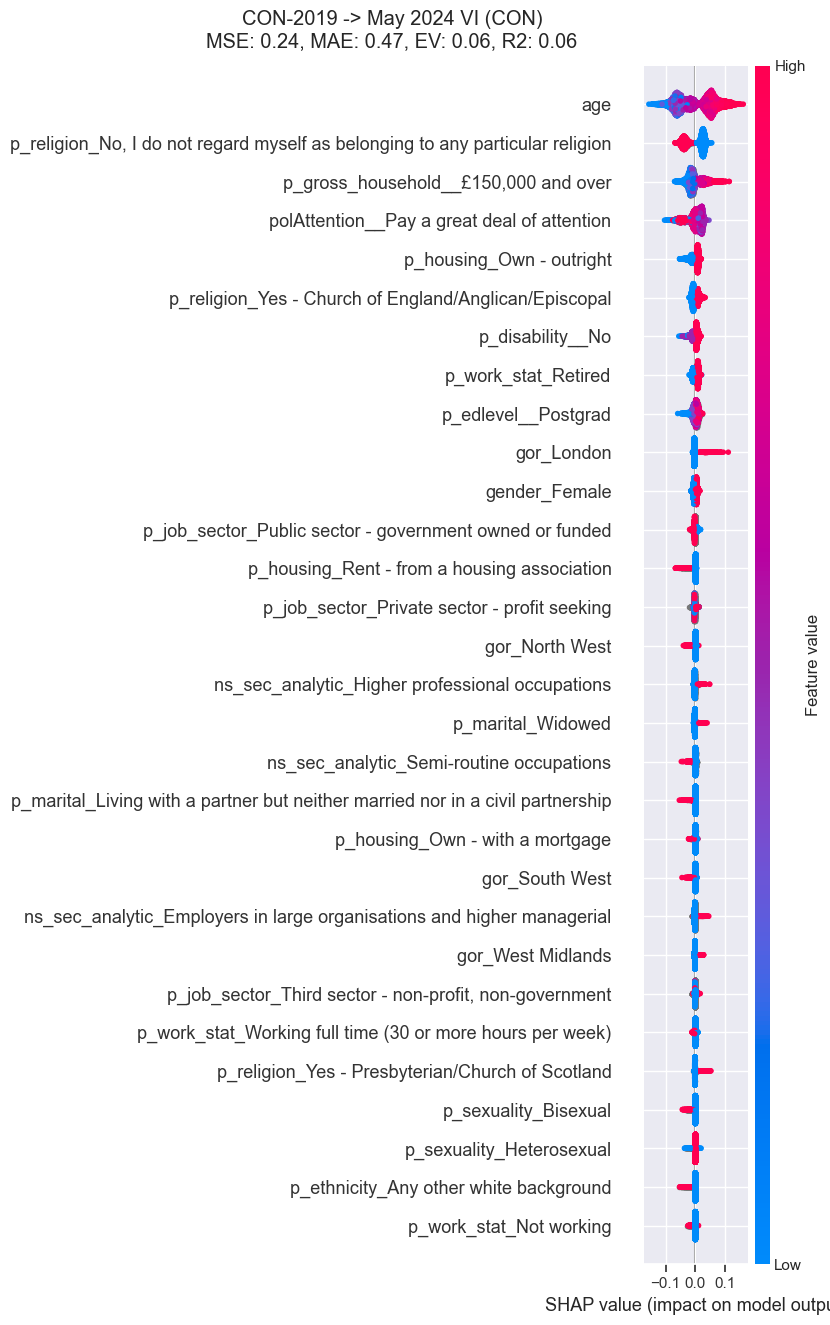

CPU times: total: 9.84 s
Wall time: 3.03 s


In [22]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name = "generalElectionVote_Conservative"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "CON-2019 -> May 2024 VI (CON)",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote",]+logistics_var +\
    pol_pref_var +\
    party_place_var +\
    att_var,
#     demo_var,
                                                    verbosity=0)

Top 20 positive (spearman) correlations for generalElectionVote_Conservative 
 
 
   
 r 
 p 
 N 
 
 
 
 
 likeCon__Strongly like 
 0.690000 
 0.00 
 7868 
 
 
 approveUKGovt__Strongly approve 
 0.620000 
 0.00 
 7843 
 
 
 likeConLeader__Strongly like 
 0.610000 
 0.00 
 7858 
 
 
 bestOnMII_Conservative 
 0.610000 
 0.00 
 6756 
 
 
 partyId_Conservative 
 0.530000 
 0.00 
 7804 
 
 
 trustMPs__A great deal of trust 
 0.460000 
 0.00 
 7834 
 
 
 lr_scale__Right 
 0.350000 
 0.00 
 5551 
 
 
 econGenRetro__Got a lot better 
 0.320000 
 0.00 
 7746 
 
 
 EUIntegrationCon__Protect our independence 
 0.300000 
 0.00 
 6906 
 
 
 changeNHS__Getting a lot better 
 0.270000 
 0.00 
 7829 
 
 
 turnoutUKGeneral__Very likely that I will vote 
 0.200000 
 0.00 
 7895 
 
 
 econPersonalRetro__Got a lot better 
 0.180000 
 0.00 
 7892 
 
 
 age 
 0.170000 
 0.00 
 7934 
 
 
 redistSelf__Government should be less concerned[...] 
 0.170000 
 0.00 
 7405 
 
 
 subjClass_Yes, middle class 
 0.150000 
 0.00 
 7644 
 
 
 immigEcon__Good for economy 
 0.140000 
 0.00 
 7703 
 
 
 immigSelf__Allow many more 
 0.140000 
 0.00 
 7765 
 
 
 p_work_stat_Retired 
 0.120000 
 0.00 
 7824 
 
 
 dutyToVote2__Strongly agree 
 0.120000 
 0.00 
 7843 
 
 
 p_housing_Own - outright 
 0.110000 
 0.00 
 7851 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Conservative 
 
 
   
 r 
 p 
 N 
 
 
 
 
 generalElectionVote_Brexit Party/Reform UK 
 -0.610000 
 0.00 
 7934 
 
 
 bestOnMII_Brexit Party/Reform UK 
 -0.450000 
 0.00 
 6756 
 
 
 efficacyPolCare__Strongly agree 
 -0.400000 
 0.00 
 7813 
 
 
 generalElectionVote_Labour 
 -0.380000 
 0.00 
 7934 
 
 
 partyId_Brexit Party/Reform UK 
 -0.320000 
 0.00 
 7804 
 
 
 likeBrexitParty__Strongly like 
 -0.310000 
 0.00 
 6882 
 
 
 likeBrexitLeader__Strongly like 
 -0.290000 
 0.00 
 4299 
 
 
 bestOnMII_Labour 
 -0.260000 
 0.00 
 6756 
 
 
 generalElectionVote_I would/did not vote 
 -0.230000 
 0.00 
 7934 
 
 
 partyId_Labour 
 -0.230000 
 0.00 
 7804 
 
 
 partyId_No - none 
 -0.210000 
 0.00 
 7804 
 
 
 immigCon__Allow many more 
 -0.200000 
 0.00 
 7015 
 
 
 generalElectionVote_Liberal Democrat 
 -0.200000 
 0.00 
 7934 
 
 
 riskPoverty__Very likely 
 -0.160000 
 0.00 
 7701 
 
 
 likeLab__Strongly like 
 -0.140000 
 0.00 
 7870 
 
 
 p_religion_No, I do not regard myself as belonging[...] 
 -0.130000 
 0.00 
 7792 
 
 
 riskUnemployment__Very likely 
 -0.130000 
 0.00 
 7306 
 
 
 generalElectionVote_Green Party 
 -0.130000 
 0.00 
 7934 
 
 
 subjClass_Yes, working class 
 -0.130000 
 0.00 
 7644 
 
 
 scotReferendumVote__Would not vote 
 -0.120000 
 0.01 
 537

MSE: 0.17, MAE: 0.34, EV: 0.33, R2: 0.33


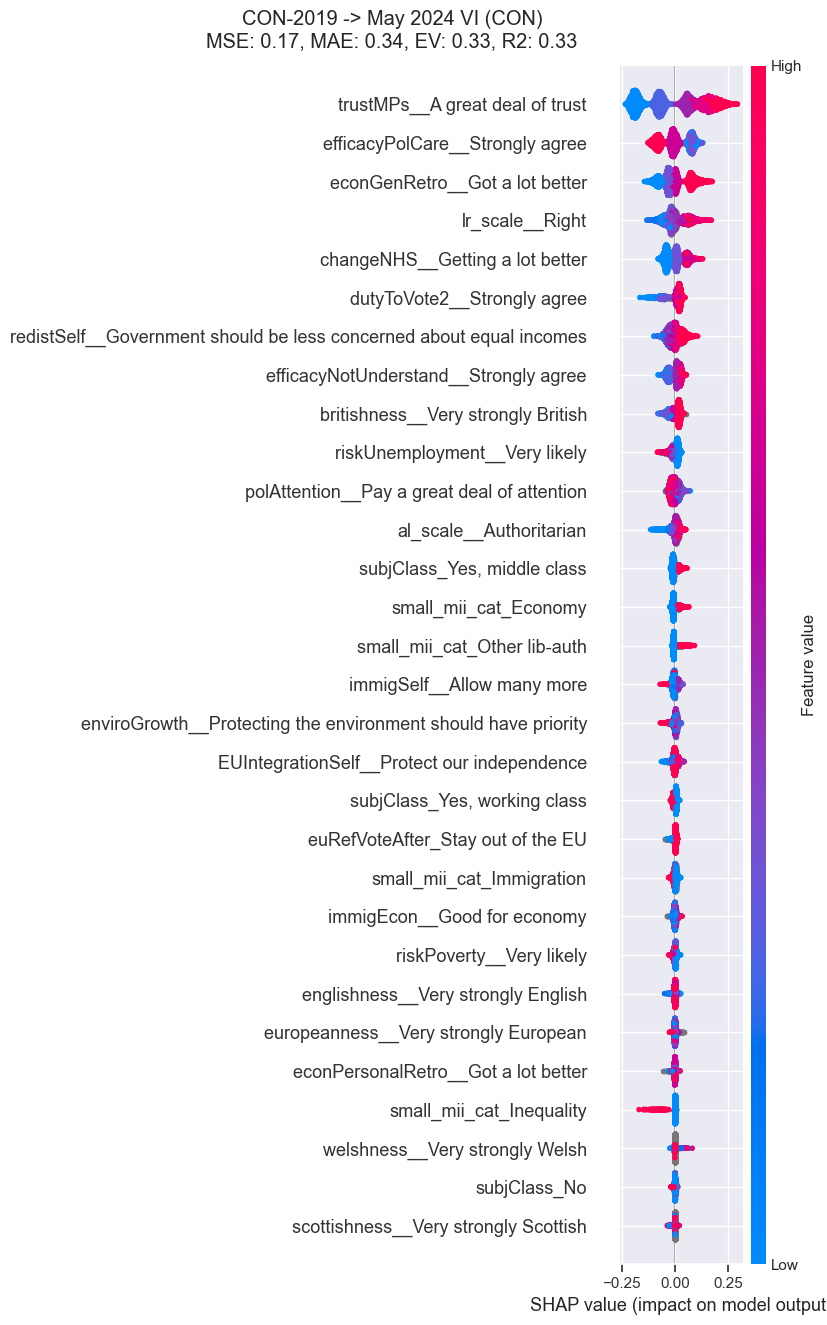

CPU times: total: 12.5 s
Wall time: 3.42 s


In [23]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name = "generalElectionVote_Conservative"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "CON-2019 -> May 2024 VI (CON)",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote",]+logistics_var +\
    pol_pref_var +\
    party_place_var +\
#     att_var,
    demo_var,
                                                    verbosity=0)

Top 20 positive (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 bestOnMII_Brexit Party/Reform UK 
 0.700000 
 0.00 
 6756 
 
 
 likeBrexitParty__Strongly like 
 0.640000 
 0.00 
 6882 
 
 
 partyId_Brexit Party/Reform UK 
 0.520000 
 0.00 
 7804 
 
 
 likeBrexitLeader__Strongly like 
 0.510000 
 0.00 
 4299 
 
 
 efficacyPolCare__Strongly agree 
 0.320000 
 0.00 
 7813 
 
 
 small_mii_cat_Immigration 
 0.310000 
 0.00 
 7484 
 
 
 EUIntegrationSelf__Protect our independence 
 0.310000 
 0.00 
 7717 
 
 
 immigLD__Allow many more 
 0.270000 
 0.00 
 5759 
 
 
 immigLab__Allow many more 
 0.270000 
 0.00 
 6804 
 
 
 immigCon__Allow many more 
 0.270000 
 0.00 
 7015 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.220000 
 0.00 
 7280 
 
 
 al_scale__Authoritarian 
 0.140000 
 0.00 
 5578 
 
 
 englishness__Very strongly English 
 0.120000 
 0.00 
 7873 
 
 
 polAttention__Pay a great deal of attention 
 0.120000 
 0.00 
 7924 
 
 
 riskPoverty__Very likely 
 0.080000 
 0.00 
 7701 
 
 
 subjClass_Yes, working class 
 0.080000 
 0.00 
 7644 
 
 
 riskUnemployment__Very likely 
 0.050000 
 0.00 
 7306 
 
 
 p_sexuality_Bisexual 
 0.040000 
 0.00 
 7725 
 
 
 redistSelf__Government should be less concerned[...] 
 0.040000 
 0.00 
 7405 
 
 
 p_housing_Rent - from a housing association 
 0.040000 
 0.00 
 7851 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 generalElectionVote_Conservative 
 -0.610000 
 0.00 
 7934 
 
 
 bestOnMII_Conservative 
 -0.390000 
 0.00 
 6756 
 
 
 likeConLeader__Strongly like 
 -0.380000 
 0.00 
 7858 
 
 
 approveUKGovt__Strongly approve 
 -0.380000 
 0.00 
 7843 
 
 
 trustMPs__A great deal of trust 
 -0.350000 
 0.00 
 7834 
 
 
 likeCon__Strongly like 
 -0.340000 
 0.00 
 7868 
 
 
 likeLD__Strongly like 
 -0.320000 
 0.00 
 7656 
 
 
 immigSelf__Allow many more 
 -0.320000 
 0.00 
 7765 
 
 
 immigEcon__Good for economy 
 -0.310000 
 0.00 
 7703 
 
 
 EUIntegrationLab__Protect our independence 
 -0.290000 
 0.00 
 6591 
 
 
 EUIntegrationCon__Protect our independence 
 -0.280000 
 0.00 
 6906 
 
 
 likeLDLeader__Strongly like 
 -0.280000 
 0.00 
 6267 
 
 
 EUIntegrationLD__Protect our independence 
 -0.270000 
 0.00 
 5843 
 
 
 likeLabLeader__Strongly like 
 -0.250000 
 0.00 
 7838 
 
 
 likeLab__Strongly like 
 -0.250000 
 0.00 
 7870 
 
 
 generalElectionVote_Labour 
 -0.230000 
 0.00 
 7934 
 
 
 partyId_Conservative 
 -0.230000 
 0.00 
 7804 
 
 
 small_mii_cat_Economy 
 -0.200000 
 0.00 
 7484 
 
 
 likeSNPLeader__Strongly like 
 -0.190000 
 0.00 
 521 
 
 
 enviroGrowth__Protecting the environment should[...] 
 -0.190000 
 0.00 
 7630

MSE: 0.14, MAE: 0.28, EV: 0.31, R2: 0.31


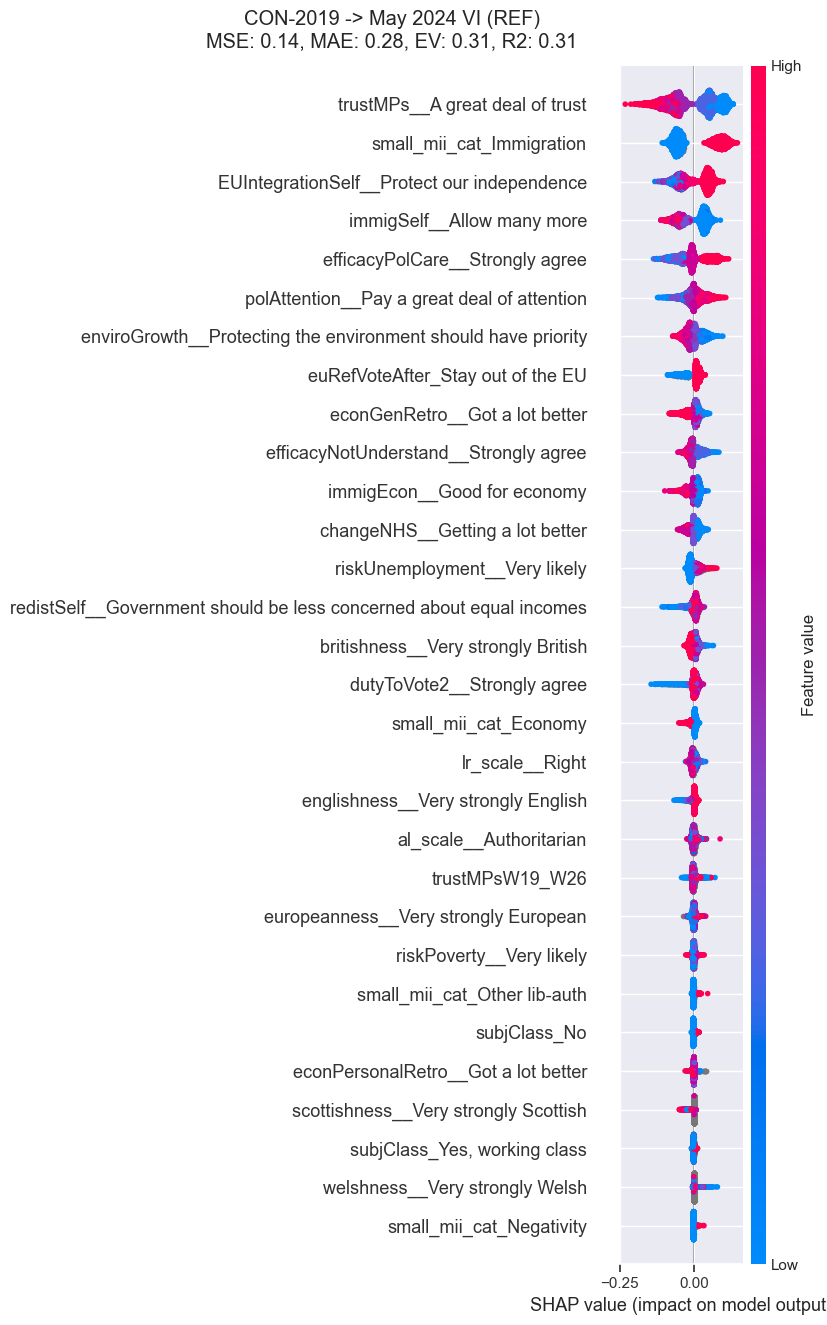

CPU times: total: 12.6 s
Wall time: 3.51 s


In [240]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name ="generalElectionVote_Brexit Party/Reform UK"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "CON-2019 -> May 2024 VI (REF)",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote",]+logistics_var +\
    pol_pref_var +\
    party_place_var +\
#     att_var,
    demo_var,
                                                    verbosity=0,use_specific_weights=BES_Panel["weight"][mask])

Top 20 positive (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 bestOnMII_Brexit Party/Reform UK 
 0.700000 
 0.00 
 6756 
 
 
 likeBrexitParty__Strongly like 
 0.640000 
 0.00 
 6882 
 
 
 partyId_Brexit Party/Reform UK 
 0.520000 
 0.00 
 7804 
 
 
 likeBrexitLeader__Strongly like 
 0.510000 
 0.00 
 4299 
 
 
 efficacyPolCare__Strongly agree 
 0.320000 
 0.00 
 7813 
 
 
 small_mii_cat_Immigration 
 0.310000 
 0.00 
 7484 
 
 
 EUIntegrationSelf__Protect our independence 
 0.310000 
 0.00 
 7717 
 
 
 immigCon__Allow many more 
 0.270000 
 0.00 
 7015 
 
 
 immigLab__Allow many more 
 0.270000 
 0.00 
 6804 
 
 
 immigLD__Allow many more 
 0.270000 
 0.00 
 5759 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.220000 
 0.00 
 7280 
 
 
 al_scale__Authoritarian 
 0.140000 
 0.00 
 5578 
 
 
 englishness__Very strongly English 
 0.120000 
 0.00 
 7873 
 
 
 polAttention__Pay a great deal of attention 
 0.120000 
 0.00 
 7924 
 
 
 subjClass_Yes, working class 
 0.080000 
 0.00 
 7644 
 
 
 riskPoverty__Very likely 
 0.080000 
 0.00 
 7701 
 
 
 riskUnemployment__Very likely 
 0.050000 
 0.00 
 7306 
 
 
 redistSelf__Government should be less concerned[...] 
 0.040000 
 0.00 
 7405 
 
 
 p_work_stat_Not working 
 0.040000 
 0.00 
 7824 
 
 
 p_housing_Rent - from a housing association 
 0.040000 
 0.00 
 7851 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 generalElectionVote_Conservative 
 -0.610000 
 0.00 
 7934 
 
 
 bestOnMII_Conservative 
 -0.390000 
 0.00 
 6756 
 
 
 likeConLeader__Strongly like 
 -0.380000 
 0.00 
 7858 
 
 
 approveUKGovt__Strongly approve 
 -0.380000 
 0.00 
 7843 
 
 
 trustMPs__A great deal of trust 
 -0.350000 
 0.00 
 7834 
 
 
 likeCon__Strongly like 
 -0.340000 
 0.00 
 7868 
 
 
 likeLD__Strongly like 
 -0.320000 
 0.00 
 7656 
 
 
 immigSelf__Allow many more 
 -0.320000 
 0.00 
 7765 
 
 
 immigEcon__Good for economy 
 -0.310000 
 0.00 
 7703 
 
 
 EUIntegrationLab__Protect our independence 
 -0.290000 
 0.00 
 6591 
 
 
 likeLDLeader__Strongly like 
 -0.280000 
 0.00 
 6267 
 
 
 EUIntegrationCon__Protect our independence 
 -0.280000 
 0.00 
 6906 
 
 
 EUIntegrationLD__Protect our independence 
 -0.270000 
 0.00 
 5843 
 
 
 likeLabLeader__Strongly like 
 -0.250000 
 0.00 
 7838 
 
 
 likeLab__Strongly like 
 -0.250000 
 0.00 
 7870 
 
 
 generalElectionVote_Labour 
 -0.230000 
 0.00 
 7934 
 
 
 partyId_Conservative 
 -0.230000 
 0.00 
 7804 
 
 
 small_mii_cat_Economy 
 -0.200000 
 0.00 
 7484 
 
 
 likeSNPLeader__Strongly like 
 -0.190000 
 0.00 
 521 
 
 
 enviroGrowth__Protecting the environment should[...] 
 -0.190000 
 0.00 
 7630

MSE: 0.19, MAE: 0.38, EV: 0.04, R2: 0.04


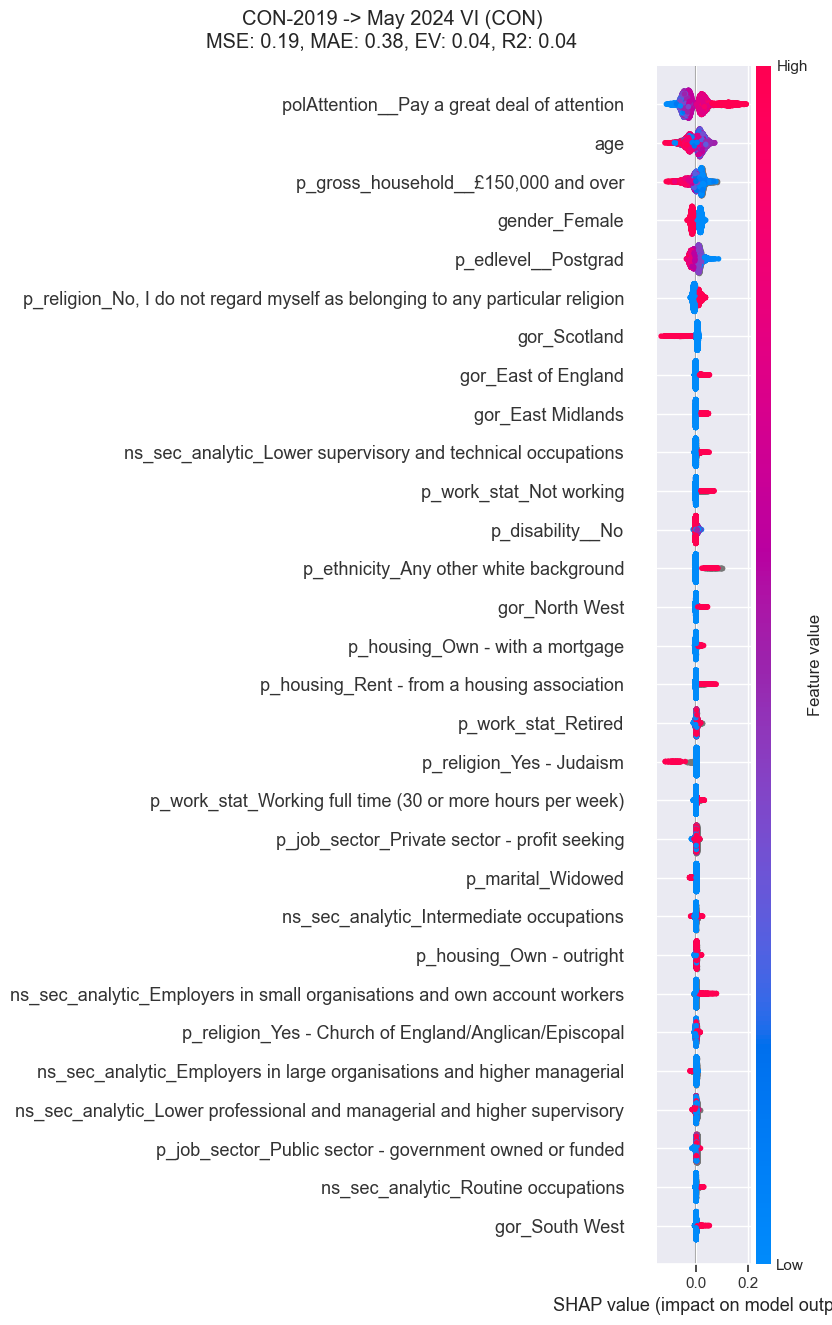

CPU times: total: 10.5 s
Wall time: 3.06 s


In [25]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name ="generalElectionVote_Brexit Party/Reform UK"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "CON-2019 -> May 2024 VI (CON)",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote",]+logistics_var +\
    pol_pref_var +\
    party_place_var +\
    att_var,
#     demo_var,
                                                    verbosity=0)

Top 20 positive (spearman) correlations for generalElectionVote_Labour 
 
 
   
 r 
 p 
 N 
 
 
 
 
 bestOnMII_Labour 
 0.640000 
 0.00 
 6756 
 
 
 partyId_Labour 
 0.560000 
 0.00 
 7804 
 
 
 likeLab__Strongly like 
 0.520000 
 0.00 
 7870 
 
 
 likeLabLeader__Strongly like 
 0.480000 
 0.00 
 7838 
 
 
 EUIntegrationLab__Protect our independence 
 0.300000 
 0.00 
 6591 
 
 
 likeLD__Strongly like 
 0.230000 
 0.00 
 7656 
 
 
 likeLDLeader__Strongly like 
 0.200000 
 0.00 
 6267 
 
 
 immigSelf__Allow many more 
 0.180000 
 0.00 
 7765 
 
 
 partyIdStrength__Not very strong 
 0.170000 
 0.00 
 6988 
 
 
 immigEcon__Good for economy 
 0.170000 
 0.00 
 7703 
 
 
 likeSNPLeader__Strongly like 
 0.140000 
 0.00 
 521 
 
 
 EUIntegrationLD__Protect our independence 
 0.140000 
 0.00 
 5843 
 
 
 small_mii_cat_Economy 
 0.130000 
 0.00 
 7484 
 
 
 enviroGrowth__Protecting the environment should[...] 
 0.130000 
 0.00 
 7630 
 
 
 redistLab__Government should be less concerned[...] 
 0.120000 
 0.00 
 6158 
 
 
 small_mii_cat_Health 
 0.110000 
 0.00 
 7484 
 
 
 small_mii_cat_Inequality 
 0.100000 
 0.00 
 7484 
 
 
 redistLD__Government should be less concerned[...] 
 0.100000 
 0.00 
 5289 
 
 
 europeanness__Very strongly European 
 0.090000 
 0.00 
 7801 
 
 
 partyId_No - none 
 0.090000 
 0.00 
 7804 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Labour 
 
 
   
 r 
 p 
 N 
 
 
 
 
 generalElectionVote_Conservative 
 -0.380000 
 0.00 
 7934 
 
 
 likeCon__Strongly like 
 -0.350000 
 0.00 
 7868 
 
 
 partyId_Conservative 
 -0.310000 
 0.00 
 7804 
 
 
 immigLab__Allow many more 
 -0.290000 
 0.00 
 6804 
 
 
 approveUKGovt__Strongly approve 
 -0.280000 
 0.00 
 7843 
 
 
 likeBrexitParty__Strongly like 
 -0.260000 
 0.00 
 6882 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.260000 
 0.00 
 7280 
 
 
 EUIntegrationSelf__Protect our independence 
 -0.250000 
 0.00 
 7717 
 
 
 likeConLeader__Strongly like 
 -0.240000 
 0.00 
 7858 
 
 
 generalElectionVote_Brexit Party/Reform UK 
 -0.230000 
 0.00 
 7934 
 
 
 bestOnMII_Conservative 
 -0.230000 
 0.00 
 6756 
 
 
 lr_scale__Right 
 -0.220000 
 0.00 
 5551 
 
 
 small_mii_cat_Immigration 
 -0.210000 
 0.00 
 7484 
 
 
 redistSelf__Government should be less concerned[...] 
 -0.200000 
 0.00 
 7405 
 
 
 likeBrexitLeader__Strongly like 
 -0.200000 
 0.00 
 4299 
 
 
 immigLD__Allow many more 
 -0.190000 
 0.00 
 5759 
 
 
 bestOnMII_Brexit Party/Reform UK 
 -0.180000 
 0.00 
 6756 
 
 
 econGenRetro__Got a lot better 
 -0.170000 
 0.00 
 7746 
 
 
 age 
 -0.150000 
 0.00 
 7934 
 
 
 englishness__Very strongly English 
 -0.130000 
 0.00 
 7873

MSE: 0.07, MAE: 0.16, EV: 0.33, R2: 0.33


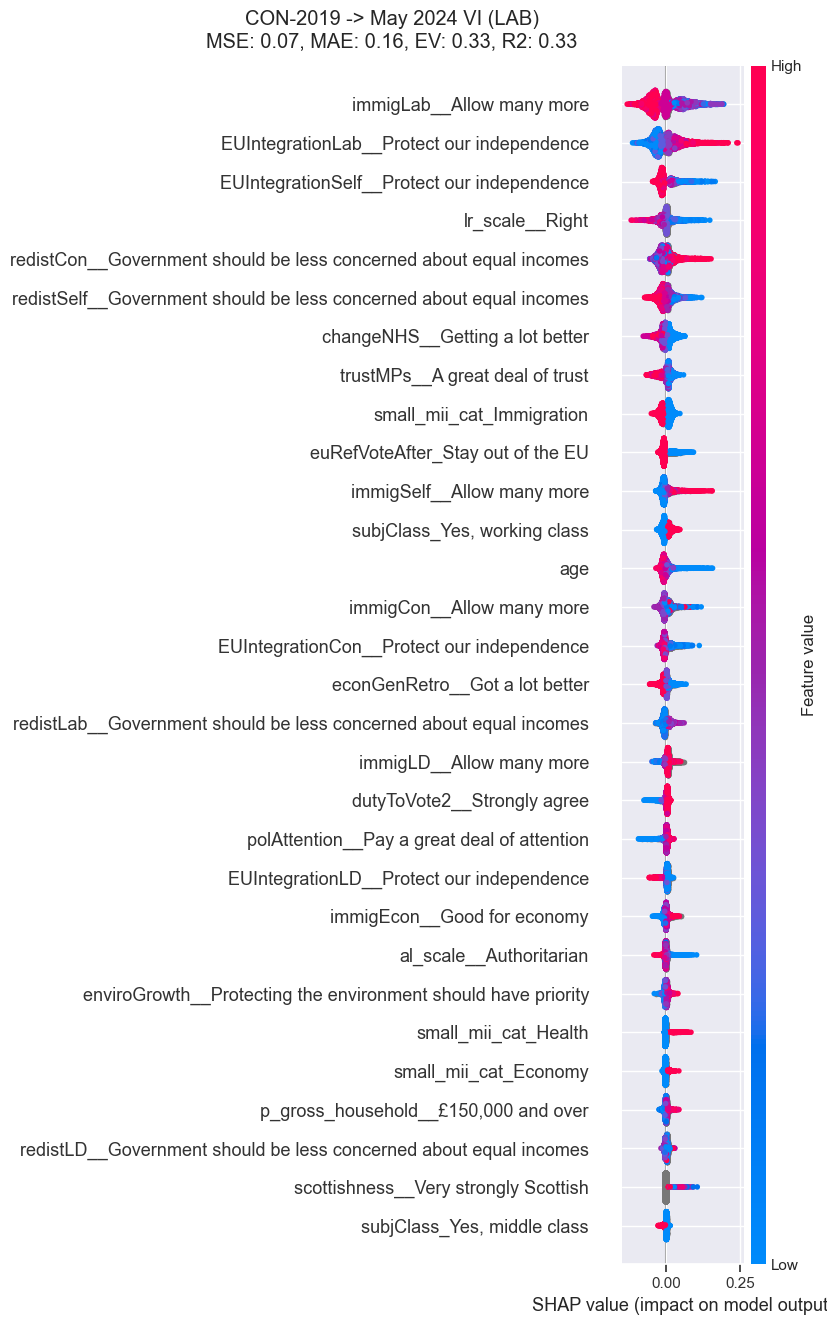

CPU times: total: 23.8 s
Wall time: 5.15 s


In [239]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name ="generalElectionVote_Labour"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "CON-2019 -> May 2024 VI (LAB)",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote","like","bestOn","partyId","approve","p_past_vote"],
#     +logistics_var +\
#     pol_pref_var +\
#     party_place_var +\
#     att_var+\
#     demo_var,
                                                    verbosity=0)

Top 20 positive (spearman) correlations for generalElectionVote_Don't know 
 
 
   
 r 
 p 
 N 
 
 
 
 
 bestOnMII_No party is best able to handle this[...] 
 0.310000 
 0.00 
 8281 
 
 
 partyIdStrength__Not very strong 
 0.260000 
 0.00 
 8733 
 
 
 partyId_No - none 
 0.160000 
 0.00 
 10116 
 
 
 likeSNPLeader__Strongly like 
 0.140000 
 0.00 
 646 
 
 
 gender_Female 
 0.130000 
 0.00 
 10420 
 
 
 likeLab__Strongly like 
 0.130000 
 0.00 
 10249 
 
 
 approveWelshGovt__Strongly approve 
 0.120000 
 0.00 
 571 
 
 
 likeSNP__Strongly like 
 0.110000 
 0.01 
 672 
 
 
 efficacyNotUnderstand__Strongly agree 
 0.100000 
 0.00 
 10301 
 
 
 EUIntegrationLab__Protect our independence 
 0.100000 
 0.00 
 8335 
 
 
 likeLD__Strongly like 
 0.100000 
 0.00 
 9904 
 
 
 immigSelf__Allow many more 
 0.100000 
 0.00 
 10116 
 
 
 immigEcon__Good for economy 
 0.090000 
 0.00 
 10015 
 
 
 enviroGrowth__Protecting the environment should[...] 
 0.090000 
 0.00 
 9902 
 
 
 likeLDLeader__Strongly like 
 0.090000 
 0.00 
 7962 
 
 
 EUIntegrationLD__Protect our independence 
 0.080000 
 0.00 
 7331 
 
 
 likeLabLeader__Strongly like 
 0.080000 
 0.00 
 10225 
 
 
 small_mii_cat_Economy 
 0.070000 
 0.00 
 9727 
 
 
 subjClass_No 
 0.070000 
 0.00 
 10000 
 
 
 redistLab__Government should be less concerned[...] 
 0.060000 
 0.00 
 7782 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Don't know 
 
 
   
 r 
 p 
 N 
 
 
 
 
 turnoutUKGeneral__Very likely that I will vote 
 -0.170000 
 0.00 
 10205 
 
 
 bestOnMII_Conservative 
 -0.170000 
 0.00 
 8281 
 
 
 likeCon__Strongly like 
 -0.170000 
 0.00 
 10240 
 
 
 likeBrexitParty__Strongly like 
 -0.140000 
 0.00 
 8716 
 
 
 polAttention__Pay a great deal of attention 
 -0.140000 
 0.00 
 10400 
 
 
 bestOnMII_Brexit Party/Reform UK 
 -0.130000 
 0.00 
 8281 
 
 
 approveUKGovt__Strongly approve 
 -0.110000 
 0.00 
 10245 
 
 
 likeBrexitLeader__Strongly like 
 -0.110000 
 0.00 
 5231 
 
 
 partyId_Brexit Party/Reform UK 
 -0.110000 
 0.00 
 10116 
 
 
 likeConLeader__Strongly like 
 -0.100000 
 0.00 
 10248 
 
 
 small_mii_cat_Immigration 
 -0.100000 
 0.00 
 9727 
 
 
 EUIntegrationSelf__Protect our independence 
 -0.090000 
 0.00 
 10041 
 
 
 trustMPs__A great deal of trust 
 -0.090000 
 0.00 
 10252 
 
 
 econGenRetro__Got a lot better 
 -0.090000 
 0.00 
 10088 
 
 
 immigLab__Allow many more 
 -0.090000 
 0.00 
 8588 
 
 
 redistSelf__Government should be less concerned[...] 
 -0.080000 
 0.00 
 9613 
 
 
 immigLD__Allow many more 
 -0.080000 
 0.00 
 7181 
 
 
 bestOnMII_Labour 
 -0.070000 
 0.00 
 8281 
 
 
 britishness__Very strongly British 
 -0.070000 
 0.00 
 10355 
 
 
 changeNHS__Getting a lot better 
 -0.060000 
 0.00 
 10255

MSE: 0.15, MAE: 0.31, EV: 0.08, R2: 0.08


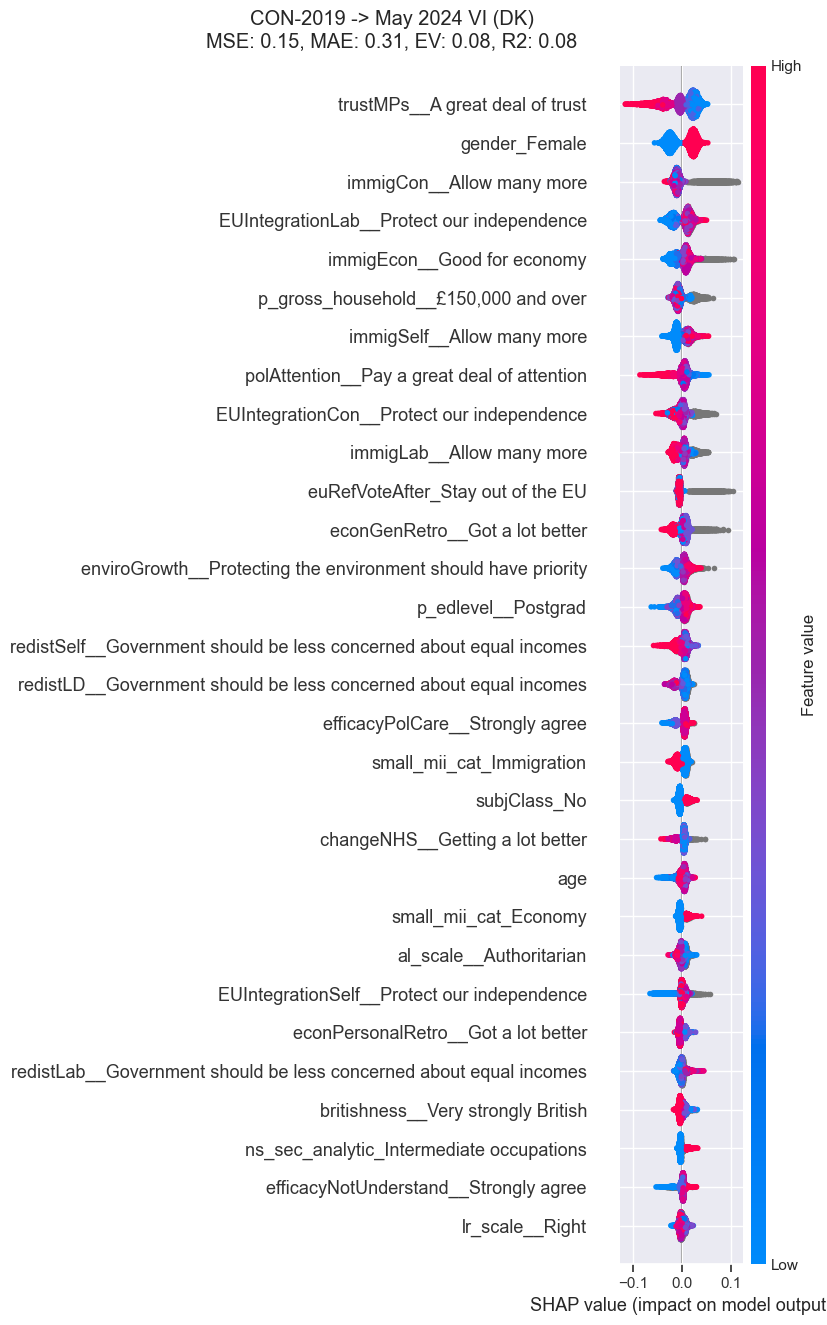

CPU times: total: 20.2 s
Wall time: 4.63 s


In [96]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name ="generalElectionVote_Don't know"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "CON-2019 -> May 2024 VI (DK)",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote","like","bestOn","partyId","approve","p_past_vote"],
#     +logistics_var +\
#     pol_pref_var +\
#     party_place_var +\
#     att_var+\
#     demo_var,
                                                    verbosity=0)

Top 20 positive (spearman) correlations for generalElectionVote_Liberal Democrat 
 
 
   
 r 
 p 
 N 
 
 
 
 
 partyId_Liberal Democrat 
 0.390000 
 0.00 
 7804 
 
 
 bestOnMII_Liberal Democrat 
 0.350000 
 0.00 
 6756 
 
 
 likeLD__Strongly like 
 0.270000 
 0.00 
 7656 
 
 
 likeLDLeader__Strongly like 
 0.230000 
 0.00 
 6267 
 
 
 EUIntegrationLD__Protect our independence 
 0.160000 
 0.00 
 5843 
 
 
 likeSNPLeader__Strongly like 
 0.130000 
 0.00 
 521 
 
 
 EUIntegrationLab__Protect our independence 
 0.120000 
 0.00 
 6591 
 
 
 likeSNP__Strongly like 
 0.110000 
 0.01 
 544 
 
 
 partyIdStrength__Not very strong 
 0.100000 
 0.00 
 6988 
 
 
 immigSelf__Allow many more 
 0.100000 
 0.00 
 7765 
 
 
 redistLD__Government should be less concerned[...] 
 0.100000 
 0.00 
 5289 
 
 
 bestOnMII_No party is best able to handle this[...] 
 0.100000 
 0.00 
 6756 
 
 
 likeLabLeader__Strongly like 
 0.090000 
 0.00 
 7838 
 
 
 enviroGrowth__Protecting the environment should[...] 
 0.090000 
 0.00 
 7630 
 
 
 likeLab__Strongly like 
 0.080000 
 0.00 
 7870 
 
 
 immigEcon__Good for economy 
 0.080000 
 0.00 
 7703 
 
 
 partyId_No - none 
 0.080000 
 0.00 
 7804 
 
 
 europeanness__Very strongly European 
 0.070000 
 0.00 
 7801 
 
 
 small_mii_cat_Europe 
 0.060000 
 0.00 
 7484 
 
 
 redistLab__Government should be less concerned[...] 
 0.060000 
 0.00 
 6158 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Liberal Democrat 
 
 
   
 r 
 p 
 N 
 
 
 
 
 generalElectionVote_Conservative 
 -0.200000 
 0.00 
 7934 
 
 
 immigLD__Allow many more 
 -0.170000 
 0.00 
 5759 
 
 
 EUIntegrationSelf__Protect our independence 
 -0.150000 
 0.00 
 7717 
 
 
 partyId_Conservative 
 -0.130000 
 0.00 
 7804 
 
 
 likeBrexitParty__Strongly like 
 -0.130000 
 0.00 
 6882 
 
 
 immigLab__Allow many more 
 -0.130000 
 0.00 
 6804 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.130000 
 0.00 
 7280 
 
 
 likeCon__Strongly like 
 -0.130000 
 0.00 
 7868 
 
 
 generalElectionVote_Brexit Party/Reform UK 
 -0.120000 
 0.00 
 7934 
 
 
 bestOnMII_Conservative 
 -0.110000 
 0.00 
 6756 
 
 
 approveUKGovt__Strongly approve 
 -0.090000 
 0.00 
 7843 
 
 
 econGenRetro__Got a lot better 
 -0.090000 
 0.00 
 7746 
 
 
 bestOnMII_Brexit Party/Reform UK 
 -0.090000 
 0.00 
 6756 
 
 
 small_mii_cat_Immigration 
 -0.090000 
 0.00 
 7484 
 
 
 redistSelf__Government should be less concerned[...] 
 -0.080000 
 0.00 
 7405 
 
 
 al_scale__Authoritarian 
 -0.070000 
 0.00 
 5578 
 
 
 lr_scale__Right 
 -0.070000 
 0.00 
 5551 
 
 
 likeBrexitLeader__Strongly like 
 -0.070000 
 0.00 
 4299 
 
 
 likeConLeader__Strongly like 
 -0.070000 
 0.00 
 7858 
 
 
 generalElectionVote_Labour 
 -0.070000 
 0.00 
 7934

MSE: 0.03, MAE: 0.07, EV: 0.05, R2: 0.05


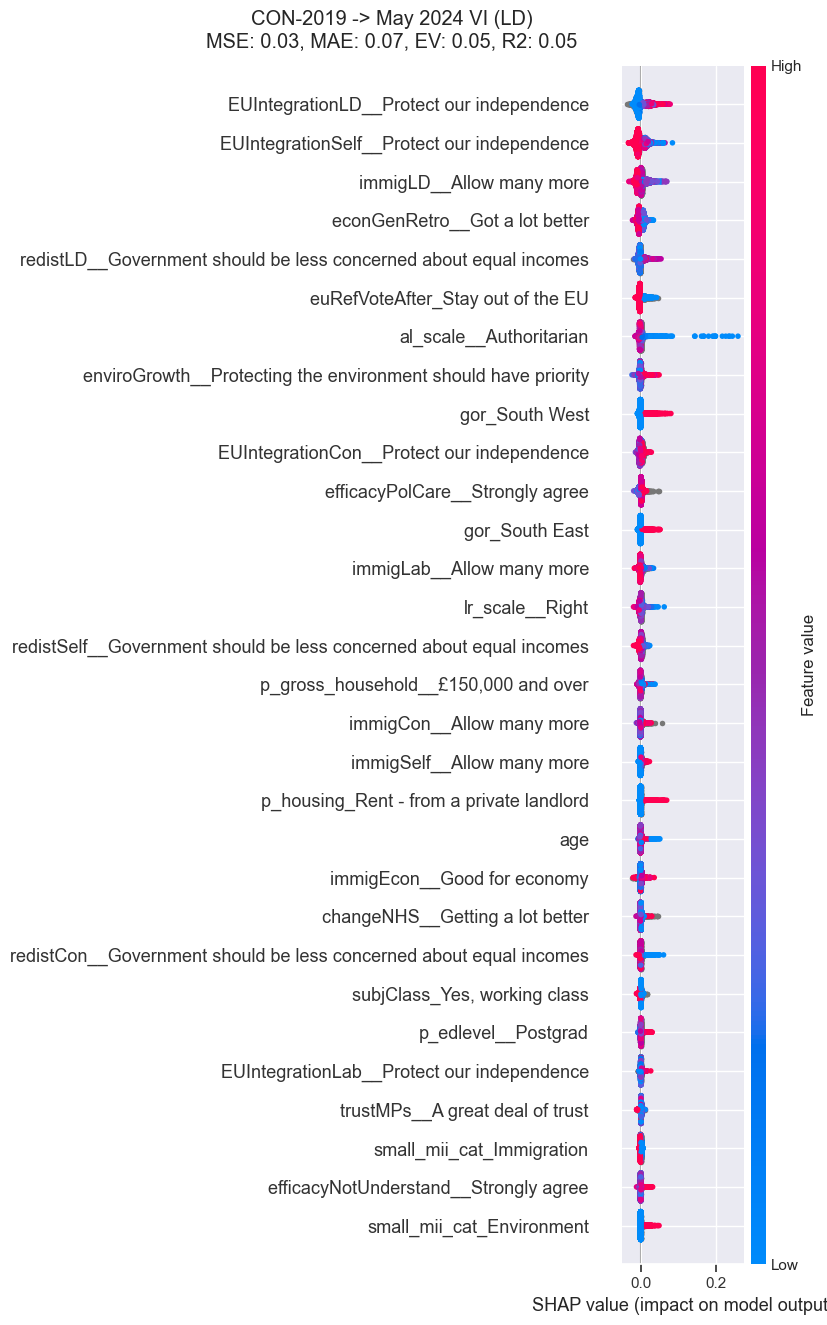

CPU times: total: 12.8 s
Wall time: 3.3 s


In [97]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name ="generalElectionVote_Liberal Democrat"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "CON-2019 -> May 2024 VI (LD)",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote","like","bestOn","partyId","approve","p_past_vote"],
#     +logistics_var +\
#     pol_pref_var +\
#     party_place_var +\
#     att_var+\
#     demo_var,
                                                    verbosity=0)

Top 20 positive (spearman) correlations for trustMPsW19_W26 
 
 
   
 r 
 p 
 N 
 
 
 
 
 trustMPs__A great deal of trust 
 0.320000 
 0.00 
 14833 
 
 
 likeLab__Strongly like 
 0.220000 
 0.00 
 14572 
 
 
 likeLabLeader__Strongly like 
 0.210000 
 0.00 
 14461 
 
 
 immigSelf__Allow many more 
 0.190000 
 0.00 
 14206 
 
 
 approveWelshGovt__Strongly approve 
 0.180000 
 0.00 
 941 
 
 
 likeLDLeader__Strongly like 
 0.180000 
 0.00 
 11270 
 
 
 bestOnMII_Labour 
 0.170000 
 0.00 
 11712 
 
 
 likeLD__Strongly like 
 0.170000 
 0.00 
 14089 
 
 
 immigEcon__Good for economy 
 0.170000 
 0.00 
 14200 
 
 
 europeanness__Very strongly European 
 0.160000 
 0.00 
 14533 
 
 
 partyId_Labour 
 0.160000 
 0.00 
 14362 
 
 
 generalElectionVote_Labour 
 0.160000 
 0.00 
 11831 
 
 
 enviroGrowth__Protecting the environment should[...] 
 0.140000 
 0.00 
 14130 
 
 
 likePC__Strongly like 
 0.140000 
 0.00 
 913 
 
 
 EUIntegrationLab__Protect our independence 
 0.130000 
 0.00 
 11706 
 
 
 approveScotGovt__Strongly approve 
 0.120000 
 0.00 
 1451 
 
 
 likeSNP__Strongly like 
 0.110000 
 0.00 
 1450 
 
 
 likeSNPLeader__Strongly like 
 0.110000 
 0.00 
 1348 
 
 
 redistCon__Government should be less concerned[...] 
 0.100000 
 0.00 
 11624 
 
 
 EUIntegrationLD__Protect our independence 
 0.100000 
 0.00 
 10384 
 
 
 

 
 Top 20 negative (spearman) correlations for trustMPsW19_W26 
 
 
   
 r 
 p 
 N 
 
 
 
 
 euRefVoteAfter_Stay out of the EU 
 -0.220000 
 0.00 
 13053 
 
 
 EUIntegrationSelf__Protect our independence 
 -0.220000 
 0.00 
 14223 
 
 
 likeBrexitParty__Strongly like 
 -0.210000 
 0.00 
 12675 
 
 
 likeBrexitLeader__Strongly like 
 -0.190000 
 0.00 
 7469 
 
 
 generalElectionVote_Brexit Party/Reform UK 
 -0.170000 
 0.00 
 11831 
 
 
 partyId_Conservative 
 -0.170000 
 0.00 
 14362 
 
 
 small_mii_cat_Immigration 
 -0.160000 
 0.00 
 13693 
 
 
 al_scale__Authoritarian 
 -0.160000 
 0.00 
 10063 
 
 
 likeCon__Strongly like 
 -0.150000 
 0.00 
 14574 
 
 
 bestOnMII_Brexit Party/Reform UK 
 -0.140000 
 0.00 
 11712 
 
 
 immigLab__Allow many more 
 -0.140000 
 0.00 
 11963 
 
 
 englishness__Very strongly English 
 -0.130000 
 0.00 
 14668 
 
 
 immigLD__Allow many more 
 -0.130000 
 0.00 
 10081 
 
 
 redistSelf__Government should be less concerned[...] 
 -0.120000 
 0.00 
 13720 
 
 
 immigSNP__Allow many more 
 -0.120000 
 0.00 
 1211 
 
 
 immigCon__Allow many more 
 -0.110000 
 0.00 
 12538 
 
 
 britishness__Very strongly British 
 -0.110000 
 0.00 
 14703 
 
 
 lr_scale__Right 
 -0.110000 
 0.00 
 10295 
 
 
 partyId_Brexit Party/Reform UK 
 -0.090000 
 0.00 
 14362 
 
 
 efficacyPolCare__Strongly agree 
 -0.090000 
 0.00 
 14623

MSE: 1.59, MAE: 0.97, EV: 0.09, R2: 0.09


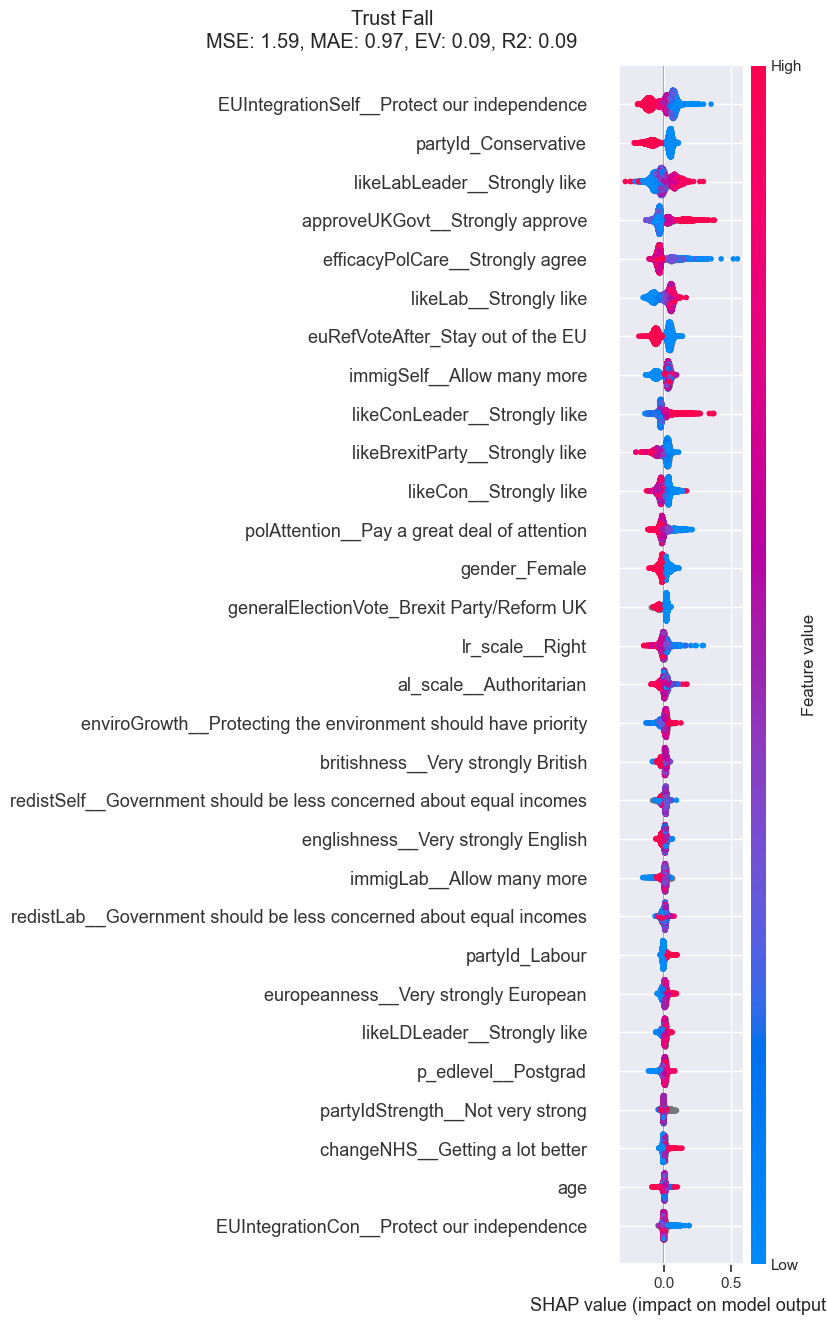

CPU times: total: 26.8 s
Wall time: 6.16 s


In [120]:
%%time

mask = BES_reduced_with_na["trustMPsW19_W26"].notnull()

name ="trustMPsW19_W26"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Trust Fall",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"trustMPs"],
#     +logistics_var +\
#     pol_pref_var +\
#     party_place_var +\
#     att_var+\
#     demo_var,
                                                    verbosity=0)

Top 20 positive (spearman) correlations for trustMPsW21_W23 
 
 
   
 r 
 p 
 N 
 
 
 
 
 generalElectionVote_Don't know 
 0.080000 
 0.00 
 4708 
 
 
 gender_Female 
 0.080000 
 0.00 
 4708 
 
 
 al_scale__Authoritarian 
 0.070000 
 0.00 
 3638 
 
 
 generalElectionVote_Brexit Party/Reform UK 
 0.060000 
 0.00 
 3583 
 
 
 riskPoverty__Very likely 
 0.060000 
 0.00 
 4552 
 
 
 efficacyPolCare__Strongly agree 
 0.060000 
 0.00 
 4638 
 
 
 partyIdStrength__Not very strong 
 0.060000 
 0.00 
 3919 
 
 
 likeBrexitLeader__Strongly like 
 0.060000 
 0.01 
 2373 
 
 
 efficacyNotUnderstand__Strongly agree 
 0.050000 
 0.00 
 4665 
 
 
 bestOnMII_No party is best able to handle this[...] 
 0.050000 
 0.00 
 3777 
 
 
 likeLDLeader__Strongly like 
 0.050000 
 0.00 
 3688 
 
 
 likeBrexitParty__Strongly like 
 0.050000 
 0.00 
 3990 
 
 
 bestOnMII_Brexit Party/Reform UK 
 0.040000 
 0.01 
 3777 
 
 
 turnoutUKGeneral__Very likely that I will vote 
 -0.040000 
 0.00 
 4619 
 
 
 p_gross_household__£150,000 and over 
 -0.040000 
 0.01 
 3466 
 
 
 immigSelf__Allow many more 
 -0.040000 
 0.01 
 4594 
 
 
 redistCon__Government should be less concerned[...] 
 -0.040000 
 0.01 
 3629 
 
 
 small_mii_cat_Other lib-auth 
 -0.040000 
 0.01 
 4424 
 
 
 p_edlevel__Postgrad 
 -0.040000 
 0.01 
 4003 
 
 
 likeConLeader__Strongly like 
 -0.060000 
 0.00 
 4638 
 
 
 

 
 Top 20 negative (spearman) correlations for trustMPsW21_W23 
 
 
   
 r 
 p 
 N 
 
 
 
 
 trustMPsW19_W26 
 -0.170000 
 0.00 
 3326 
 
 
 trustMPs__A great deal of trust 
 -0.100000 
 0.00 
 4661 
 
 
 changeNHS__Getting a lot better 
 -0.100000 
 0.00 
 4650 
 
 
 bestOnMII_Conservative 
 -0.090000 
 0.00 
 3777 
 
 
 econGenRetro__Got a lot better 
 -0.090000 
 0.00 
 4573 
 
 
 generalElectionVote_Conservative 
 -0.090000 
 0.00 
 3583 
 
 
 approveUKGovt__Strongly approve 
 -0.080000 
 0.00 
 4655 
 
 
 lr_scale__Right 
 -0.080000 
 0.00 
 3659 
 
 
 likeCon__Strongly like 
 -0.070000 
 0.00 
 4633 
 
 
 econPersonalRetro__Got a lot better 
 -0.060000 
 0.00 
 4681 
 
 
 likeConLeader__Strongly like 
 -0.060000 
 0.00 
 4638 
 
 
 redistCon__Government should be less concerned[...] 
 -0.040000 
 0.01 
 3629 
 
 
 immigSelf__Allow many more 
 -0.040000 
 0.01 
 4594 
 
 
 p_gross_household__£150,000 and over 
 -0.040000 
 0.01 
 3466 
 
 
 p_edlevel__Postgrad 
 -0.040000 
 0.01 
 4003 
 
 
 turnoutUKGeneral__Very likely that I will vote 
 -0.040000 
 0.00 
 4619 
 
 
 small_mii_cat_Other lib-auth 
 -0.040000 
 0.01 
 4424 
 
 
 bestOnMII_Brexit Party/Reform UK 
 0.040000 
 0.01 
 3777 
 
 
 bestOnMII_No party is best able to handle this[...] 
 0.050000 
 0.00 
 3777 
 
 
 efficacyNotUnderstand__Strongly agree 
 0.050000 
 0.00 
 4665

MSE: 1.40, MAE: 0.92, EV: 0.02, R2: 0.02


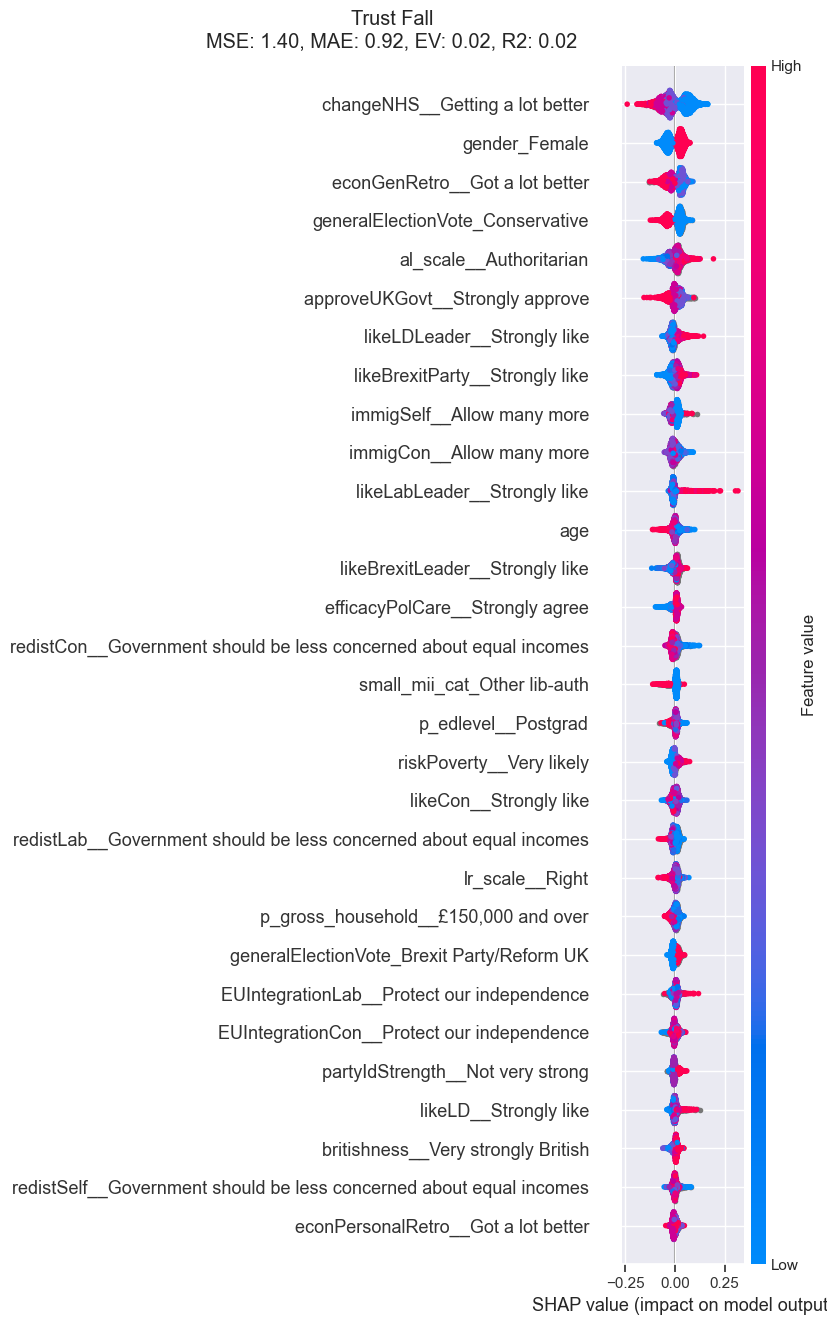

CPU times: total: 10.4 s
Wall time: 2.6 s


In [270]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name ="trustMPsW21_W23"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "Trust Fall",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"trustMPs"],
#     +logistics_var +\
#     pol_pref_var +\
#     party_place_var +\
#     att_var+\
#     demo_var,
                                                    verbosity=0)

Top 20 positive (spearman) correlations for trustMPs__A great deal of trust 
 
 
   
 r 
 p 
 N 
 
 
 
 
 approveUKGovt__Strongly approve 
 0.550000 
 0.00 
 10114 
 
 
 likeConLeader__Strongly like 
 0.530000 
 0.00 
 10109 
 
 
 likeCon__Strongly like 
 0.520000 
 0.00 
 10103 
 
 
 generalElectionVote_Conservative 
 0.460000 
 0.00 
 7834 
 
 
 trustMPsW19_W26 
 0.400000 
 0.00 
 6402 
 
 
 bestOnMII_Conservative 
 0.390000 
 0.00 
 8202 
 
 
 lr_scale__Right 
 0.360000 
 0.00 
 7116 
 
 
 econGenRetro__Got a lot better 
 0.330000 
 0.00 
 9951 
 
 
 changeNHS__Getting a lot better 
 0.320000 
 0.00 
 10114 
 
 
 partyId_Conservative 
 0.290000 
 0.00 
 9976 
 
 
 approveWelshGovt__Strongly approve 
 0.250000 
 0.00 
 564 
 
 
 immigSelf__Allow many more 
 0.240000 
 0.00 
 10006 
 
 
 immigEcon__Good for economy 
 0.230000 
 0.00 
 9888 
 
 
 econPersonalRetro__Got a lot better 
 0.220000 
 0.00 
 10195 
 
 
 likeLDLeader__Strongly like 
 0.220000 
 0.00 
 7874 
 
 
 EUIntegrationCon__Protect our independence 
 0.220000 
 0.00 
 8638 
 
 
 approveScotGovt__Strongly approve 
 0.200000 
 0.00 
 655 
 
 
 turnoutUKGeneral__Very likely that I will vote 
 0.200000 
 0.00 
 10052 
 
 
 EUIntegrationLab__Protect our independence 
 0.190000 
 0.00 
 8261 
 
 
 likeLD__Strongly like 
 0.190000 
 0.00 
 9779 
 
 
 

 
 Top 20 negative (spearman) correlations for trustMPs__A great deal of trust 
 
 
   
 r 
 p 
 N 
 
 
 
 
 efficacyPolCare__Strongly agree 
 -0.610000 
 0.00 
 10098 
 
 
 generalElectionVote_Brexit Party/Reform UK 
 -0.350000 
 0.00 
 7834 
 
 
 bestOnMII_Brexit Party/Reform UK 
 -0.240000 
 0.00 
 8202 
 
 
 partyId_Brexit Party/Reform UK 
 -0.200000 
 0.00 
 9976 
 
 
 partyId_No - none 
 -0.190000 
 0.00 
 9976 
 
 
 riskPoverty__Very likely 
 -0.170000 
 0.00 
 9909 
 
 
 likeBrexitParty__Strongly like 
 -0.160000 
 0.00 
 8617 
 
 
 generalElectionVote_I would/did not vote 
 -0.160000 
 0.00 
 7834 
 
 
 immigLab__Allow many more 
 -0.150000 
 0.00 
 8514 
 
 
 immigLD__Allow many more 
 -0.150000 
 0.00 
 7127 
 
 
 al_scale__Authoritarian 
 -0.150000 
 0.00 
 7110 
 
 
 bestOnMII_No party is best able to handle this[...] 
 -0.130000 
 0.00 
 8202 
 
 
 EUIntegrationSelf__Protect our independence 
 -0.120000 
 0.00 
 9923 
 
 
 immigSNP__Allow many more 
 -0.120000 
 0.00 
 560 
 
 
 small_mii_cat_Immigration 
 -0.110000 
 0.00 
 9607 
 
 
 p_religion_No, I do not regard myself as belonging[...] 
 -0.110000 
 0.00 
 10049 
 
 
 immigCon__Allow many more 
 -0.110000 
 0.00 
 8786 
 
 
 efficacyNotUnderstand__Strongly agree 
 -0.110000 
 0.00 
 10162 
 
 
 subjClass_Yes, working class 
 -0.100000 
 0.00 
 9867 
 
 
 generalElectionVote_Labour 
 -0.100000 
 0.00 
 7834

MSE: 1.16, MAE: 0.85, EV: 0.42, R2: 0.42


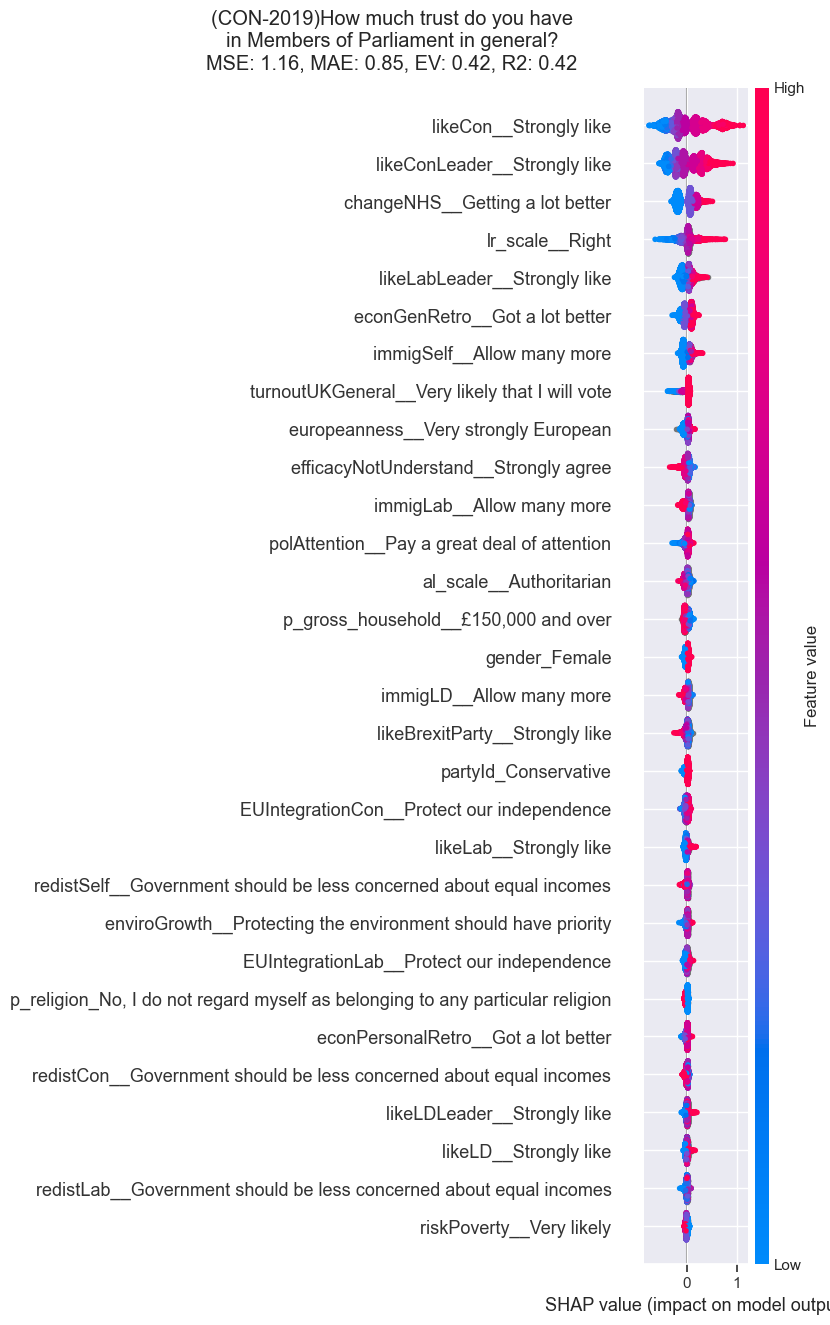

CPU times: total: 28.3 s
Wall time: 5.67 s


In [280]:
%%time

mask = BES_Panel["p_past_vote_2019"]=="Conservative"

name ="trustMPs__A great deal of trust"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "(CON-2019)How much trust do you have\nin Members of Parliament in general?",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"trustMPs","efficacyPolCare","approveUKGovt",
                                                                    "generalElectionVote","bestOnMII"],
#     +logistics_var +\
#     pol_pref_var +\
#     party_place_var +\
#     att_var+\
#     demo_var,
                                                    verbosity=0)

Top 20 positive (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 bestOnMII_Brexit Party/Reform UK 
 0.740000 
 0.00 
 16240 
 
 
 likeBrexitParty__Strongly like 
 0.600000 
 0.00 
 16770 
 
 
 partyId_Brexit Party/Reform UK 
 0.590000 
 0.00 
 19405 
 
 
 likeBrexitLeader__Strongly like 
 0.530000 
 0.00 
 9886 
 
 
 small_mii_cat_Immigration 
 0.420000 
 0.00 
 18375 
 
 
 EUIntegrationSelf__Protect our independence 
 0.410000 
 0.00 
 18871 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.410000 
 0.00 
 17484 
 
 
 immigLab__Allow many more 
 0.340000 
 0.00 
 16162 
 
 
 immigLD__Allow many more 
 0.320000 
 0.00 
 13494 
 
 
 immigCon__Allow many more 
 0.300000 
 0.00 
 16901 
 
 
 al_scale__Authoritarian 
 0.280000 
 0.00 
 13177 
 
 
 englishness__Very strongly English 
 0.240000 
 0.00 
 19551 
 
 
 redistSelf__Government should be less concerned[...] 
 0.190000 
 0.00 
 18231 
 
 
 efficacyPolCare__Strongly agree 
 0.190000 
 0.00 
 19435 
 
 
 britishness__Very strongly British 
 0.150000 
 0.00 
 19590 
 
 
 age 
 0.130000 
 0.00 
 19874 
 
 
 likeCon__Strongly like 
 0.110000 
 0.00 
 19413 
 
 
 p_work_stat_Retired 
 0.100000 
 0.00 
 19389 
 
 
 partyId_Conservative 
 0.100000 
 0.00 
 19405 
 
 
 p_religion_Yes - Church of[...] 
 0.100000 
 0.00 
 19307 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 immigSelf__Allow many more 
 -0.390000 
 0.00 
 18810 
 
 
 immigEcon__Good for economy 
 -0.380000 
 0.00 
 18887 
 
 
 likeLab__Strongly like 
 -0.370000 
 0.00 
 19394 
 
 
 likeLD__Strongly like 
 -0.360000 
 0.00 
 18536 
 
 
 likeLabLeader__Strongly like 
 -0.350000 
 0.00 
 19093 
 
 
 likeLDLeader__Strongly like 
 -0.330000 
 0.00 
 14103 
 
 
 generalElectionVote_Labour 
 -0.330000 
 0.00 
 19874 
 
 
 EUIntegrationLab__Protect our independence 
 -0.330000 
 0.00 
 15714 
 
 
 EUIntegrationLD__Protect our independence 
 -0.290000 
 0.00 
 13628 
 
 
 EUIntegrationCon__Protect our independence 
 -0.290000 
 0.00 
 16396 
 
 
 bestOnMII_Labour 
 -0.280000 
 0.00 
 16240 
 
 
 enviroGrowth__Protecting the environment should[...] 
 -0.270000 
 0.00 
 18749 
 
 
 europeanness__Very strongly European 
 -0.270000 
 0.00 
 19270 
 
 
 partyId_Labour 
 -0.250000 
 0.00 
 19405 
 
 
 generalElectionVote_Conservative 
 -0.210000 
 0.00 
 19874 
 
 
 redistCon__Government should be less concerned[...] 
 -0.210000 
 0.00 
 15504 
 
 
 trustMPs__A great deal of trust 
 -0.200000 
 0.00 
 19416 
 
 
 trustMPsW19_W26 
 -0.180000 
 0.00 
 9896 
 
 
 small_mii_cat_Economy 
 -0.180000 
 0.00 
 18375 
 
 
 redistLD__Government should be less concerned[...] 
 -0.180000 
 0.00 
 13107

MSE: 0.07, MAE: 0.14, EV: 0.44, R2: 0.44


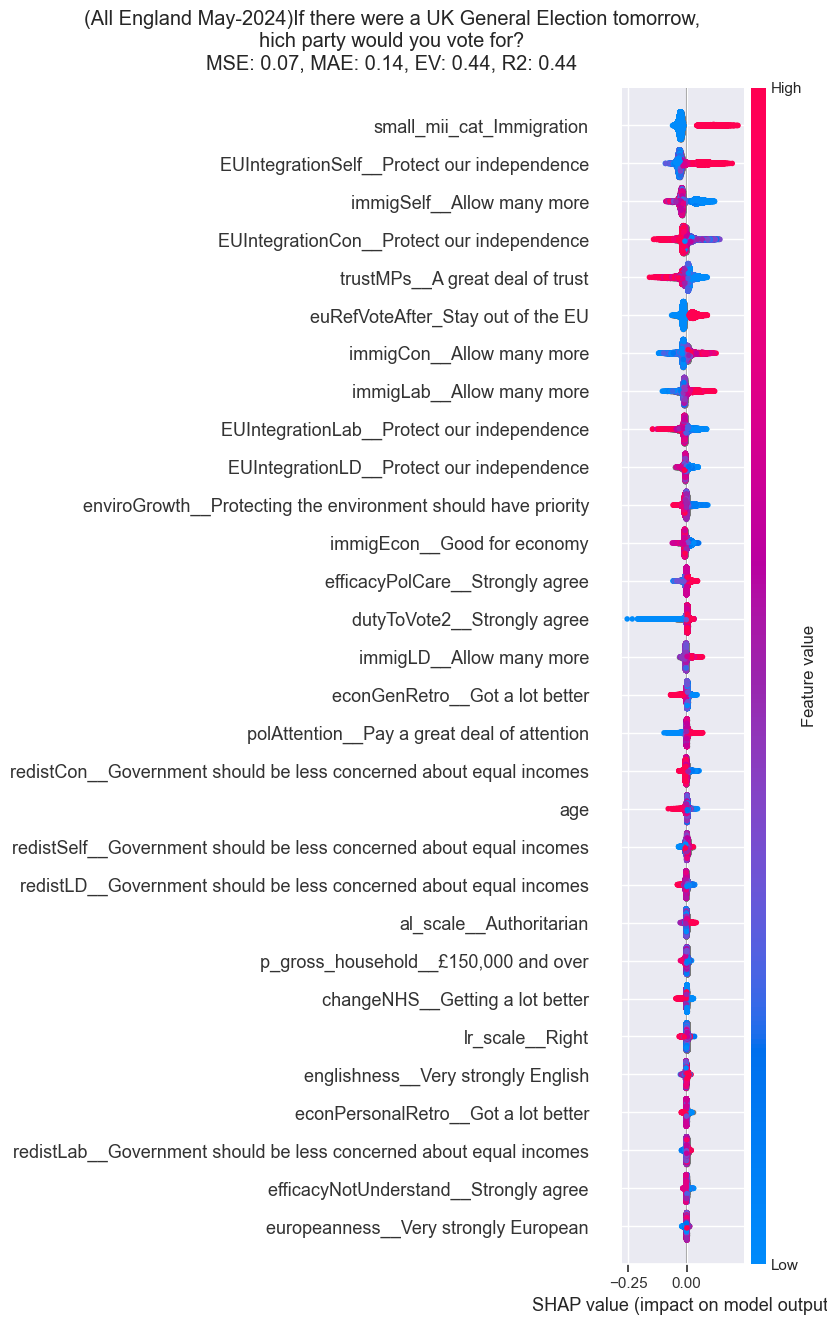

CPU times: total: 43.8 s
Wall time: 9.08 s


In [289]:
%%time

mask = BES_Panel["generalElectionVote"].notnull()&England

name ="generalElectionVote_Brexit Party/Reform UK"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "(All England May-2024)If there were a UK General Election tomorrow,\nhich party would you vote for?",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote","like","bestOn","partyId","approve"],
#     +logistics_var +\
#     pol_pref_var +\
#     party_place_var +\
#     att_var+\
#     demo_var,
                                                    verbosity=0)

Top 20 positive (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 bestOnMII_Brexit Party/Reform UK 
 0.700000 
 0.00 
 5920 
 
 
 likeBrexitParty__Strongly like 
 0.650000 
 0.00 
 6028 
 
 
 partyId_Brexit Party/Reform UK 
 0.520000 
 0.00 
 6848 
 
 
 likeBrexitLeader__Strongly like 
 0.520000 
 0.00 
 3814 
 
 
 efficacyPolCare__Strongly agree 
 0.320000 
 0.00 
 6856 
 
 
 small_mii_cat_Immigration 
 0.310000 
 0.00 
 6578 
 
 
 EUIntegrationSelf__Protect our independence 
 0.310000 
 0.00 
 6766 
 
 
 immigCon__Allow many more 
 0.280000 
 0.00 
 6138 
 
 
 immigLab__Allow many more 
 0.270000 
 0.00 
 5959 
 
 
 immigLD__Allow many more 
 0.270000 
 0.00 
 5039 
 
 
 euRefVoteAfter_Stay out of the EU 
 0.220000 
 0.00 
 6381 
 
 
 al_scale__Authoritarian 
 0.150000 
 0.00 
 4903 
 
 
 polAttention__Pay a great deal of attention 
 0.130000 
 0.00 
 6952 
 
 
 englishness__Very strongly English 
 0.120000 
 0.00 
 6909 
 
 
 subjClass_Yes, working class 
 0.080000 
 0.00 
 6711 
 
 
 riskPoverty__Very likely 
 0.070000 
 0.00 
 6748 
 
 
 redistSelf__Government should be less concerned[...] 
 0.050000 
 0.00 
 6495 
 
 
 riskUnemployment__Very likely 
 0.040000 
 0.00 
 6418 
 
 
 bestOnMII_Other party 
 0.040000 
 0.00 
 5920 
 
 
 p_work_stat_Not working 
 0.030000 
 0.01 
 6872 
 
 
 

 
 Top 20 negative (spearman) correlations for generalElectionVote_Brexit Party/Reform UK 
 
 
   
 r 
 p 
 N 
 
 
 
 
 generalElectionVote_Conservative 
 -0.620000 
 0.00 
 6962 
 
 
 bestOnMII_Conservative 
 -0.400000 
 0.00 
 5920 
 
 
 likeConLeader__Strongly like 
 -0.390000 
 0.00 
 6892 
 
 
 approveUKGovt__Strongly approve 
 -0.380000 
 0.00 
 6881 
 
 
 trustMPs__A great deal of trust 
 -0.350000 
 0.00 
 6880 
 
 
 likeCon__Strongly like 
 -0.340000 
 0.00 
 6899 
 
 
 immigSelf__Allow many more 
 -0.330000 
 0.00 
 6812 
 
 
 likeLD__Strongly like 
 -0.320000 
 0.00 
 6705 
 
 
 immigEcon__Good for economy 
 -0.310000 
 0.00 
 6761 
 
 
 EUIntegrationCon__Protect our independence 
 -0.290000 
 0.00 
 6035 
 
 
 EUIntegrationLab__Protect our independence 
 -0.280000 
 0.00 
 5756 
 
 
 likeLDLeader__Strongly like 
 -0.280000 
 0.00 
 5491 
 
 
 EUIntegrationLD__Protect our independence 
 -0.270000 
 0.00 
 5108 
 
 
 likeLabLeader__Strongly like 
 -0.250000 
 0.00 
 6874 
 
 
 likeLab__Strongly like 
 -0.240000 
 0.00 
 6900 
 
 
 partyId_Conservative 
 -0.230000 
 0.00 
 6848 
 
 
 generalElectionVote_Labour 
 -0.220000 
 0.00 
 6962 
 
 
 enviroGrowth__Protecting the environment should[...] 
 -0.200000 
 0.00 
 6696 
 
 
 small_mii_cat_Economy 
 -0.190000 
 0.00 
 6578 
 
 
 europeanness__Very strongly European 
 -0.170000 
 0.00 
 6838

MSE: 0.13, MAE: 0.26, EV: 0.36, R2: 0.36


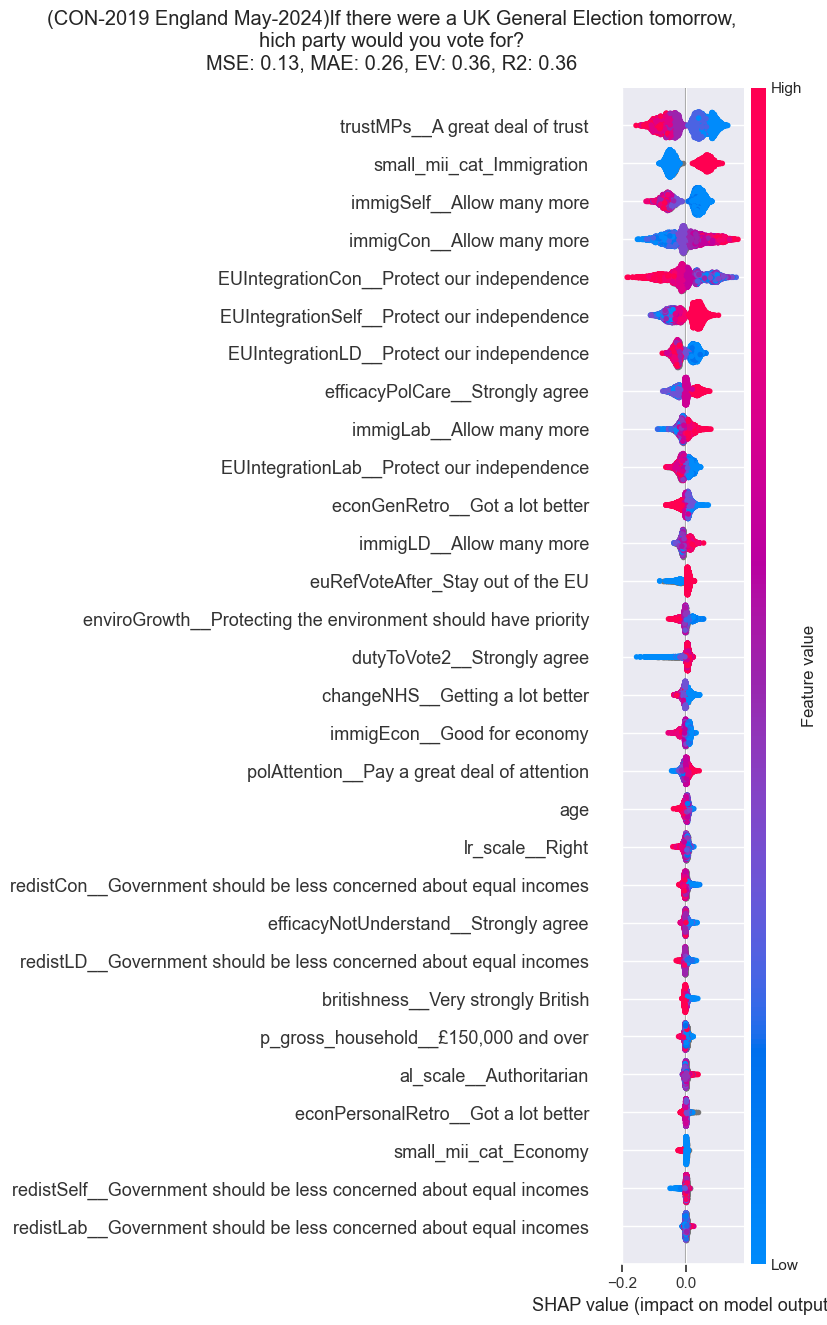

CPU times: total: 13.3 s
Wall time: 3.28 s


In [290]:
%%time

mask = (BES_Panel["p_past_vote_2019"]=="Conservative")&England

name ="generalElectionVote_Brexit Party/Reform UK"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "(CON-2019 England May-2024)If there were a UK General Election tomorrow,\nhich party would you vote for?",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"generalElectionVote","like","bestOn","partyId","approve"],
#     +logistics_var +\
#     pol_pref_var +\
#     party_place_var +\
#     att_var+\
#     demo_var,
                                                    verbosity=0)

Top 20 positive (spearman) correlations for trustMPs__A great deal of trust 
 
 
   
 r 
 p 
 N 
 
 
 
 
 likeConLeader__Strongly like 
 0.400000 
 0.00 
 23728 
 
 
 approveUKGovt__Strongly approve 
 0.380000 
 0.00 
 23934 
 
 
 likeCon__Strongly like 
 0.360000 
 0.00 
 23690 
 
 
 trustMPsW19_W26 
 0.320000 
 0.00 
 12413 
 
 
 generalElectionVote_Conservative 
 0.320000 
 0.00 
 19416 
 
 
 lr_scale__Right 
 0.300000 
 0.00 
 16569 
 
 
 econGenRetro__Got a lot better 
 0.290000 
 0.00 
 23405 
 
 
 bestOnMII_Conservative 
 0.280000 
 0.00 
 18920 
 
 
 changeNHS__Getting a lot better 
 0.270000 
 0.00 
 23905 
 
 
 likeLDLeader__Strongly like 
 0.230000 
 0.00 
 16892 
 
 
 partyId_Conservative 
 0.210000 
 0.00 
 23468 
 
 
 likeLabLeader__Strongly like 
 0.200000 
 0.00 
 23333 
 
 
 econPersonalRetro__Got a lot better 
 0.200000 
 0.00 
 23969 
 
 
 turnoutUKGeneral__Very likely that I will vote 
 0.190000 
 0.00 
 23905 
 
 
 likeLD__Strongly like 
 0.190000 
 0.00 
 22503 
 
 
 polAttention__Pay a great deal of attention 
 0.180000 
 0.00 
 24287 
 
 
 subjClass_Yes, middle class 
 0.170000 
 0.00 
 23128 
 
 
 immigSelf__Allow many more 
 0.170000 
 0.00 
 23035 
 
 
 immigEcon__Good for economy 
 0.160000 
 0.00 
 23118 
 
 
 likeLab__Strongly like 
 0.150000 
 0.00 
 23656 
 
 
 

 
 Top 20 negative (spearman) correlations for trustMPs__A great deal of trust 
 
 
   
 r 
 p 
 N 
 
 
 
 
 efficacyPolCare__Strongly agree 
 -0.570000 
 0.00 
 23916 
 
 
 partyId_No - none 
 -0.210000 
 0.00 
 23468 
 
 
 generalElectionVote_Brexit Party/Reform UK 
 -0.200000 
 0.00 
 19416 
 
 
 generalElectionVote_I would/did not vote 
 -0.200000 
 0.00 
 19416 
 
 
 riskPoverty__Very likely 
 -0.190000 
 0.00 
 23195 
 
 
 bestOnMII_No party is best able to handle this[...] 
 -0.170000 
 0.00 
 18920 
 
 
 efficacyNotUnderstand__Strongly agree 
 -0.160000 
 0.00 
 24068 
 
 
 bestOnMII_Brexit Party/Reform UK 
 -0.150000 
 0.00 
 18920 
 
 
 partyId_Brexit Party/Reform UK 
 -0.140000 
 0.00 
 23468 
 
 
 al_scale__Authoritarian 
 -0.120000 
 0.00 
 16099 
 
 
 subjClass_Yes, working class 
 -0.120000 
 0.00 
 23128 
 
 
 p_religion_No, I do not regard myself as belonging[...] 
 -0.100000 
 0.00 
 23576 
 
 
 riskUnemployment__Very likely 
 -0.090000 
 0.00 
 21940 
 
 
 generalElectionVote_Green Party 
 -0.080000 
 0.00 
 19416 
 
 
 small_mii_cat_Negativity 
 -0.080000 
 0.00 
 22450 
 
 
 partyIdStrength__Not very strong 
 -0.080000 
 0.00 
 19530 
 
 
 p_work_stat_Not working 
 -0.070000 
 0.00 
 23729 
 
 
 generalElectionVote_Don't know 
 -0.070000 
 0.00 
 24346 
 
 
 redistCon__Government should be less concerned[...] 
 -0.060000 
 0.00 
 18531 
 
 
 bestOnMII_Other party 
 -0.060000 
 0.00 
 18920

MSE: 1.27, MAE: 0.89, EV: 0.31, R2: 0.31


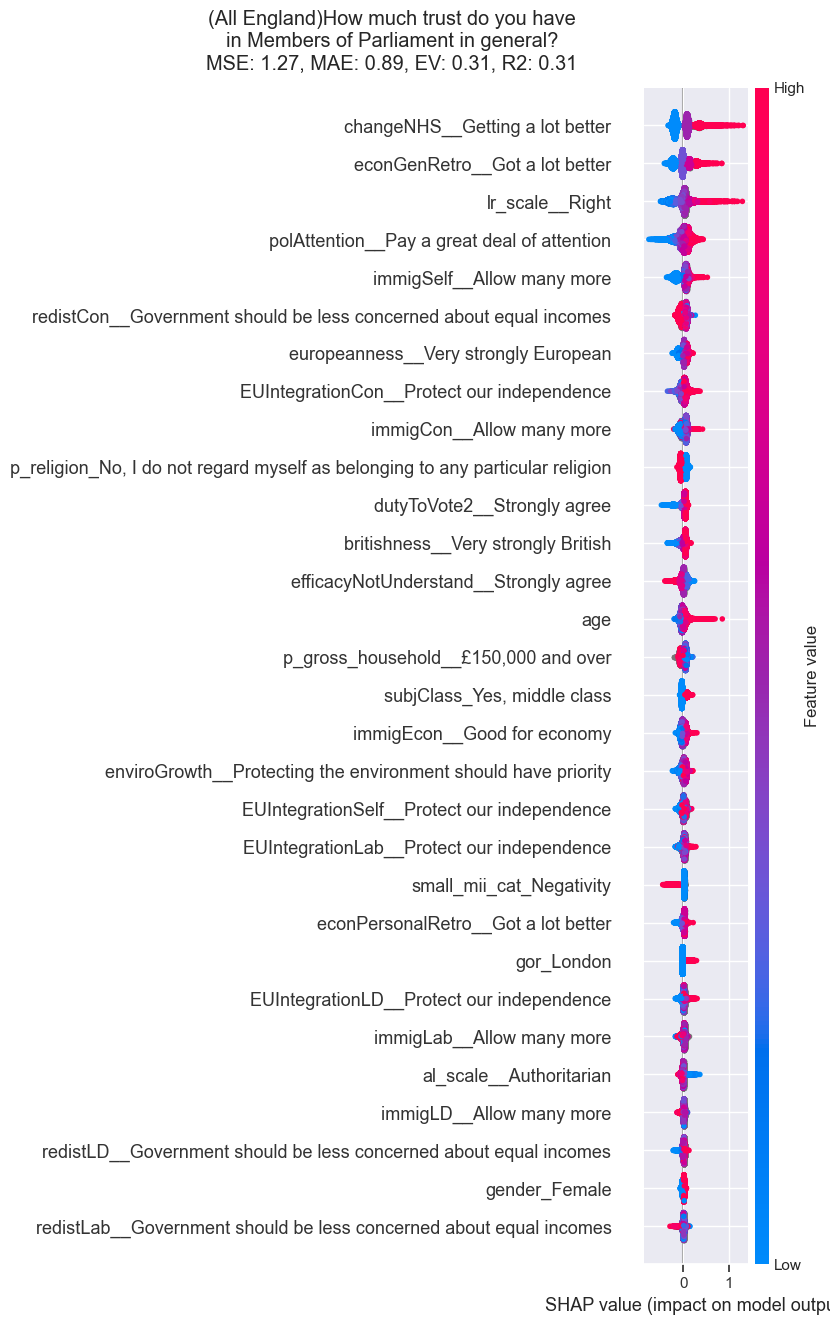

CPU times: total: 1min 15s
Wall time: 14.1 s


In [284]:
%%time

mask = BES_Panel["trustMPs"].notnull()&England

name ="trustMPs__A great deal of trust"

df, corr_type = make_corr_summary(BES_reduced_with_na[mask], name)
display_corr(df,name,corr_type)

(explainer, shap_values, train_columns, train_index, alg,output_subfolder,metrics) = xgboost_run(
    title = "(All England)How much trust do you have\nin Members of Parliament in general?",dataset=BES_reduced_with_na[mask],
                                                    var_list = [name],
                                                    var_stub_list = [name,"trustMPs","efficacyPolCare",
                                                                    "generalElectionVote","like","bestOn","partyId","approve","p_past_vote"],
#     +logistics_var +\
#     pol_pref_var +\
#     party_place_var +\
#     att_var+\
#     demo_var,
                                                    verbosity=0)

In [27]:
# efficacyPolCare
# Politicians don’t care what people like me think
# approveUKGovt
# Do you approve or disapprove of the job that each of the following are doing? (UK Govt)



generalElectionVote
Labour                                      9442
Don't know                                  5128
Conservative                                4950
Brexit Party/Reform UK                      3012
Liberal Democrat                            2045
I would/did not vote                        1990
Green Party                                 1546
Scottish National Party (SNP)                699
Other                                        573
Plaid Cymru                                  167
United Kingdom Independence Party (UKIP)       0
British National Party (BNP)                   0
Change UK- The Independent Group               0
An independent candidate                       0
Name: count, dtype: int64

In [282]:
England

id
9         False
14         True
18        False
24         True
30         True
          ...  
115586     True
115587    False
115588     True
115589    False
115590     True
Name: gor, Length: 30085, dtype: bool

In [29]:
BES_reduced_with_na["generalElectionVote_Don't know"] = BES_Panel["generalElectionVote"]=="Don't know"

In [61]:
England = BES_Panel["gor"].isin(['North East', 'North West', 'Yorkshire and the Humber', 'East Midlands',
       'West Midlands', 'East of England', 'London', 'South East',
       'South West'])
# 45717    Scottish National Party (SNP) - let's assume he knows better than gor!
England.loc[45717]=False


In [30]:
BES_Panel["generalElectionVote"] = BES_Panel["generalElectionVote"].cat.remove_unused_categories()

In [64]:
BES_Panel["generalElectionVoteEngland"] = BES_Panel["generalElectionVote"]
BES_Panel.loc[~England,"generalElectionVoteEngland"]=np.nan

# 1 guy somehow intending to vote SNP despite being registered in England!
# BES_Panel["generalElectionVoteEngland"] = BES_Panel["generalElectionVoteEngland"].replace("Scottish National Party (SNP)",np.nan)
BES_Panel["generalElectionVoteEngland"] = BES_Panel["generalElectionVoteEngland"].cat.remove_unused_categories()

BES_Panel["generalElectionVoteEngland"]

id
9                          NaN
14                Conservative
18                         NaN
24                 Green Party
30                 Green Party
                  ...         
115586            Conservative
115587                     NaN
115588                  Labour
115589                     NaN
115590    I would/did not vote
Name: generalElectionVoteEngland, Length: 30085, dtype: category
Categories (8, object): ['I would/did not vote' < 'Conservative' < 'Labour' < 'Liberal Democrat' < 'Green Party' < 'Other' < 'Brexit Party/Reform UK' < 'Don't know']

In [91]:
(pd.crosstab(BES_Panel["generalElectionVoteEngland"][England],
            BES_Panel["p_past_vote_2019"][England].cat.remove_unused_categories(),
            values=BES_Panel["weight"][England],aggfunc=sum,
            normalize='columns',margins=True).round(2)*100).astype(int)

p_past_vote_2019            Conservative  Labour  Liberal Democrat  \
generalElectionVoteEngland                                           
I would/did not vote                   5       2                 2   
Conservative                          36       1                 5   
Labour                                10      71                35   
Liberal Democrat                       3       3                34   
Green Party                            1       9                 5   
Other                                  2       2                 1   
Brexit Party/Reform UK                20       1                 2   
Don't know                            22      10                16   

p_past_vote_2019            United Kingdom Independence Party (UKIP)  \
generalElectionVoteEngland                                             
I would/did not vote                                               0   
Conservative                                                       0   
Labour                                                            22   
Liberal Democrat                                                   0   
Green Party                                                        3   
Other                                                              0   
Brexit Party/Reform UK                                            24   
Don't know                                                        51   

p_past_vote_2019            Green Party  Other  Brexit Party/Reform UK  \
generalElectionVoteEngland                                               
I would/did not vote                  3      8                       8   
Conservative                          2      5                       8   
Labour                               26     20                      12   
Liberal Democrat                      5      5                       1   
Green Party                          39      4                       3   
Other                                 2     12                       4   
Brexit Party/Reform UK                3     13                      46   
Don't know                           20     32                      17   

p_past_vote_2019            An independent candidate  Don't know  All  
generalElectionVoteEngland                                             
I would/did not vote                               3           6    4  
Conservative                                       4           3   18  
Labour                                            30          17   33  
Liberal Democrat                                  11           6    7  
Green Party                                        3           8    6  
Other                                              8           2    2  
Brexit Party/Reform UK                            13           2   12  
Don't know                                        27          57   18

In [67]:
pd.crosstab(BES_Panel["trustMPs"][England],
            BES_Panel["generalElectionVoteEngland"][England],
            values=BES_Panel["weight"][England],aggfunc=sum,
            normalize='columns',margins=True).round(4)*100

generalElectionVoteEngland  I would/did not vote  Conservative  Labour  \
trustMPs                                                                 
No trust                                   56.25         11.13   28.04   
2                                          18.06         20.07   30.63   
3                                           7.35         21.05   18.85   
4                                           4.72         23.52   12.49   
5                                           1.18         16.48    5.92   
6                                           0.15          4.36    0.99   
A great deal of trust                       0.07          1.15    0.35   
Don't know                                 12.22          2.23    2.73   

generalElectionVoteEngland  Liberal Democrat  Green Party  Other  \
trustMPs                                                           
No trust                               24.68        38.47  59.38   
2                                      30.62        33.81  22.43   
3                                      18.95        15.70   7.82   
4                                      14.13         5.79   4.51   
5                                       7.95         2.58   2.53   
6                                       1.10         0.72   1.16   
A great deal of trust                   0.46         0.05   1.02   
Don't know                              2.10         2.87   1.15   

generalElectionVoteEngland  Brexit Party/Reform UK  Don't know    All  
trustMPs                                                               
No trust                                     51.01       34.92  32.98  
2                                            27.73       26.87  26.80  
3                                            11.02       16.08  16.31  
4                                             6.44        9.24  11.70  
5                                             2.46        3.65   6.12  
6                                             0.34        0.60   1.26  
A great deal of trust                         0.12        0.03   0.37  
Don't know                                    0.87        8.60   4.46

In [68]:
pd.crosstab(BES_Panel["trustMPs"][England],
            BES_Panel["p_past_vote_2019"][England].cat.remove_unused_categories(),
            values=BES_Panel["weight"][England],aggfunc=sum,
            normalize='columns',margins=True).round(4)*100

p_past_vote_2019       Conservative  Labour  Liberal Democrat  \
trustMPs                                                        
No trust                      29.92   31.90             22.60   
2                             25.19   29.41             32.37   
3                             17.55   17.52             19.10   
4                             14.36   11.78             13.33   
5                              8.54    5.13              8.13   
6                              1.81    1.01              1.03   
A great deal of trust          0.32    0.15              0.20   
Don't know                     2.31    3.12              3.23   

p_past_vote_2019       United Kingdom Independence Party (UKIP)  Green Party  \
trustMPs                                                                       
No trust                                                  49.65        34.17   
2                                                         24.24        27.96   
3                                                          2.81        19.15   
4                                                          0.00         9.60   
5                                                          1.94         4.59   
6                                                          0.00         0.49   
A great deal of trust                                      2.38         0.00   
Don't know                                                18.99         4.04   

p_past_vote_2019       Other  Brexit Party/Reform UK  \
trustMPs                                               
No trust               49.16                   50.73   
2                      22.44                   26.05   
3                      13.77                   13.41   
4                       6.82                    5.22   
5                       4.65                    1.85   
6                       0.12                    0.83   
A great deal of trust   0.00                    0.00   
Don't know              3.03                    1.91   

p_past_vote_2019       An independent candidate  Don't know    All  
trustMPs                                                            
No trust                                  32.90       38.12  30.62  
2                                         25.87       24.17  27.48  
3                                         27.40       15.22  17.62  
4                                          6.52        7.92  12.81  
5                                          6.32        1.89   6.96  
6                                          0.00        0.00   1.34  
A great deal of trust                      0.00        0.61   0.24  
Don't know                                 0.99       12.08   2.93

In [35]:
search(BES_Panel,"gor")

gor    30064
dtype: int64

In [36]:
BES_Panel["gor"].value_counts()

gor
South East                  4407
North West                  3163
Scotland                    3029
South West                  2981
East of England             2957
London                      2851
Yorkshire and the Humber    2589
West Midlands               2441
East Midlands               2382
Wales                       1945
North East                  1319
Northern Ireland               0
Name: count, dtype: int64

In [202]:
search(BES_reduced_with_na,"EUINtegration")

EUIntegrationSelf__Protect our independence    28133
EUIntegrationCon__Protect our independence     23847
EUIntegrationLab__Protect our independence     22758
EUIntegrationLD__Protect our independence      19674
EUIntegrationSNP__Protect our independence      2605
dtype: int64

trustMPs
No trust                 0.288771
2                        0.247866
3                        0.188782
4                        0.155969
5                        0.095666
6                        0.020064
A great deal of trust    0.002882
Name: All, dtype: float64

In [86]:
party_label={"Labour":"LAB","Conservative":"CON","Don't know":"DK",
             "Brexit Party/Reform UK":"REF","Liberal Democrat":"LD",
             "I would/did not vote":"WNV"}
party_col={"Labour":"red","Conservative":"blue","Don't know":"grey",
             "Brexit Party/Reform UK":"cyan","Liberal Democrat":"orange",
             "I would/did not vote":"black"}

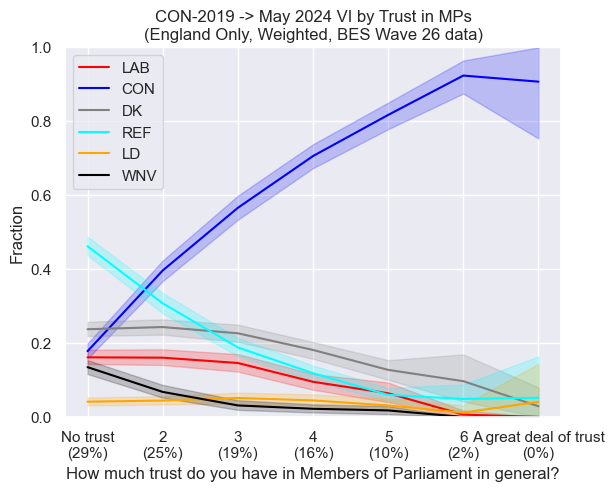

In [87]:
start_party = "Conservative"

mask = England & (BES_Panel["p_past_vote_2019"]==start_party)
trustMPs = BES_Panel["trustMPs"].replace("Don't know",np.nan)
perc_ser = (pd.crosstab(trustMPs[mask],BES_Panel["p_past_vote_2019"][mask],normalize='all')[start_party]*100).round().astype(int)
trustMPs = trustMPs.cat.rename_categories( [ x+"\n("+str(perc_ser[x])+"%)" for x in trustMPs.cat.categories])

for party in party_label.keys():

    sns.lineplot(x=trustMPs[mask],#.replace("Don't know",np.nan),
                 y=BES_reduced_with_na["generalElectionVote_"+party][mask],c=party_col[party],label=party_label[party],
                 weights=BES_Panel["weight"][mask])

plt.ylim([0,1]);
plt.legend();
plt.ylabel("Fraction");
plt.title(party_label[start_party]+"-2019 -> May 2024 VI by Trust in MPs\n(England Only, Weighted, BES Wave 26 data)");
# plt.xticks(rotation=90);
plt.xlabel("How much trust do you have in Members of Parliament in general?");

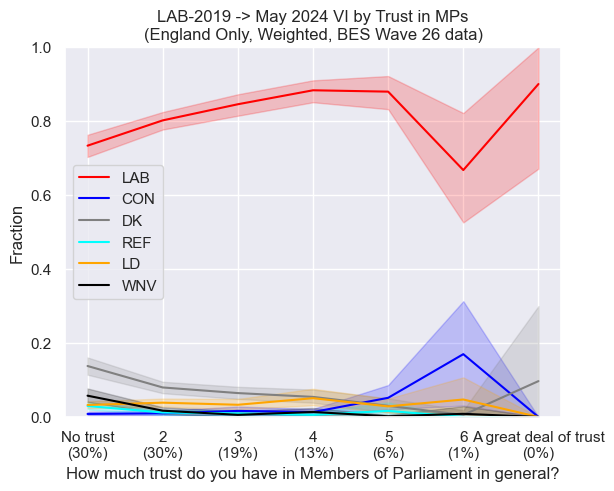

In [88]:
start_party = "Labour"

mask = England & (BES_Panel["p_past_vote_2019"]==start_party)
trustMPs = BES_Panel["trustMPs"].replace("Don't know",np.nan)
perc_ser = (pd.crosstab(trustMPs[mask],BES_Panel["p_past_vote_2019"][mask],normalize='all')[start_party]*100).round().astype(int)
trustMPs = trustMPs.cat.rename_categories( [ x+"\n("+str(perc_ser[x])+"%)" for x in trustMPs.cat.categories])


for party in party_label.keys():

    sns.lineplot(x=trustMPs[mask],#.replace("Don't know",np.nan),
                 y=BES_reduced_with_na["generalElectionVote_"+party][mask],c=party_col[party],label=party_label[party],
                 weights=BES_Panel["weight"][mask])

plt.ylim([0,1]);
plt.legend();
plt.ylabel("Fraction");
plt.title(party_label[start_party]+"-2019 -> May 2024 VI by Trust in MPs\n(England Only, Weighted, BES Wave 26 data)");
# plt.xticks(rotation=90);
plt.xlabel("How much trust do you have in Members of Parliament in general?");

In [40]:
mask.sum()

6676

In [41]:
BES_reduced_with_na["generalElectionVote_Labour"][mask].mean()

0.8126491646778043

In [303]:
data= BES_Panel[search(BES_Panel,"subjClass|ns_sec|al_scale|p_edlevel|age|p_gross|gender|weight").index]

In [309]:
data["subjClass"].value_counts().index

CategoricalIndex(['Yes, working class', 'Yes, middle class', 'No',
                  'Don't know', 'Yes, other'],
                 categories=['No', 'Yes, middle class', 'Yes, working class', 'Yes, other', 'Don't know'], ordered=True, dtype='category', name='subjClass')

In [311]:
replace_dict_broad = {'Yes, working class':"WC",'Yes, middle class':"MC",'No':"NEITHER","Don't know":np.nan,'Yes, other':"NEITHER"}
data["subjClassBroad"]= data["subjClass"].astype('object').replace(replace_dict_broad)
replace_dict_binary = {'Yes, working class':0,'Yes, middle class':1,'No':np.nan,"Don't know":np.nan,'Yes, other':np.nan}
data["subjClassBinary"]= data["subjClass"].astype('object').replace(replace_dict_binary)

In [316]:
data["al_scale"] = data["al_scale"].cat.codes.replace(-1,np.nan)
data["age"] = data["age"].astype('float')
data["p_edlevel"] = data["p_edlevel"].cat.codes.replace(-1,np.nan)
data["p_gross_househol1d"] = data["p_gross_household"].replace('Prefer not to answer',np.nan).replace("Don't know",np.nan).cat.codes.replace(-1,np.nan)
data["gender"] = data["gender"].astype('object').replace("Female",1).replace("Men",0)

In [337]:
data["ns_sec_analytic"].value_counts(dropna=False).sort_index()

ns_sec_analytic
Employers in large organisations and higher managerial       850
Higher professional occupations                             3268
Lower professional and managerial and higher supervisory    7709
Intermediate occupations                                    5185
Employers in small organisations and own account workers    1447
Lower supervisory and technical occupations                 1460
Semi-routine occupations                                    2307
Routine occupations                                         1441
NaN                                                         6418
Name: count, dtype: int64

In [347]:
ind_var_cols = ['age', 'p_gross_household', 'p_edlevel', 'al_scale', 'gender']
data[ind_var_cols] = (data[ind_var_cols]-data[ind_var_cols].mean())/data[ind_var_cols].std()

In [348]:
data.describe()

weight           age  p_gross_household     p_edlevel  \
count  30064.000000  3.006400e+04       2.221700e+04  2.596300e+04   
mean       0.999728  2.117637e-16       2.046844e-17  1.696786e-16   
std        0.765695  1.000000e+00       1.000000e+00  1.000000e+00   
min        0.051843 -2.224251e+00      -1.826689e+00 -2.302846e+00   
25%        0.525456 -7.059328e-01      -7.670594e-01 -8.127827e-01   
50%        0.770769  1.700198e-01       2.766284e-02 -6.775102e-02   
75%        1.232696  8.123850e-01       8.223851e-01  6.772806e-01   
max       16.079548  2.447496e+00       1.882015e+00  1.422312e+00   

           al_scale        gender  subjClassBinary  
count  1.955800e+04  3.006400e+04     20420.000000  
mean   1.162561e-16 -5.010480e-17         0.405387  
std    1.000000e+00  1.000000e+00         0.490979  
min   -2.657123e+00 -1.111620e+00         0.000000  
25%   -7.241567e-01 -1.111620e+00         0.000000  
50%    1.349393e-01  8.995580e-01         0.000000  
75%    7.792613e-01  8.995580e-01         1.000000  
max    1.638357e+00  8.995580e-01         1.000000

In [350]:
data.select_dtypes('number').corr()

weight       age  p_gross_household  p_edlevel  al_scale  \
weight             1.000000 -0.519817           0.044254   0.031878  0.005867   
age               -0.519817  1.000000          -0.267770  -0.201922  0.259942   
p_gross_household  0.044254 -0.267770           1.000000   0.356485 -0.185533   
p_edlevel          0.031878 -0.201922           0.356485   1.000000 -0.363702   
al_scale           0.005867  0.259942          -0.185533  -0.363702  1.000000   
gender            -0.102073 -0.055003          -0.112756  -0.015543  0.014347   
subjClassBinary   -0.118516  0.016934           0.306034   0.337024 -0.178394   

                     gender  subjClassBinary  
weight            -0.102073        -0.118516  
age               -0.055003         0.016934  
p_gross_household -0.112756         0.306034  
p_edlevel         -0.015543         0.337024  
al_scale           0.014347        -0.178394  
gender             1.000000        -0.014308  
subjClassBinary   -0.014308         1.000000

In [341]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline

                            OLS Regression Results                            
Dep. Variable:        subjClassBinary   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     4.262
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           0.000965
Time:                        23:02:05   Log-Likelihood:                -171.40
No. Observations:                 265   AIC:                             354.8
Df Residuals:                     259   BIC:                             376.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5001      0.04

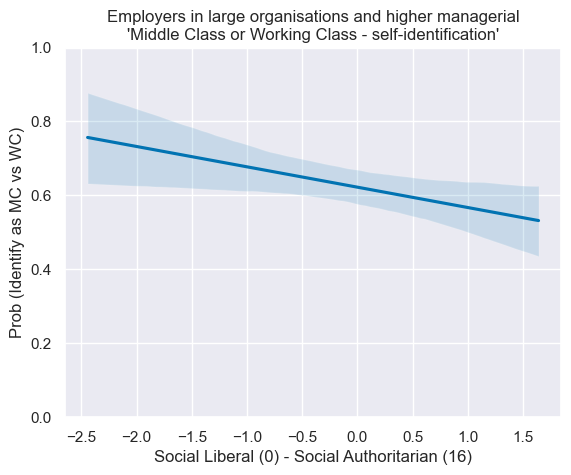

In [351]:
objClass = data["ns_sec_analytic"].cat.categories[0]
mask = data["ns_sec_analytic"] == objClass
sns.regplot(x=data["al_scale"][mask],y=data["subjClassBinary"][mask], scatter=False);
plt.ylim([0,1]);
plt.ylabel("Prob (Identify as MC vs WC)");
plt.xlabel("Social Liberal (-) - Social Authoritarian (+)");
plt.title(objClass+"\n'Middle Class or Working Class - self-identification'");

prestige_model = ols("subjClassBinary ~ p_gross_household + age + gender + al_scale + p_edlevel", data=data[mask]).fit()
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:        subjClassBinary   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     6.623
Date:                Mon, 01 Jul 2024   Prob (F-statistic):           5.37e-06
Time:                        23:13:29   Log-Likelihood:                -132.33
No. Observations:                 542   AIC:                             276.7
Df Residuals:                     536   BIC:                             302.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.1843      0.02

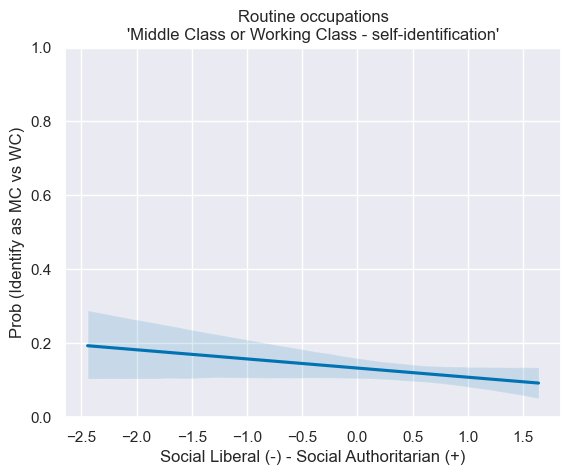

In [356]:
objClass = data["ns_sec_analytic"].cat.categories[7]
mask = data["ns_sec_analytic"] == objClass
sns.regplot(x=data["al_scale"][mask],y=data["subjClassBinary"][mask], scatter=False);
plt.ylim([0,1]);
plt.ylabel("Prob (Identify as MC vs WC)");
plt.xlabel("Social Liberal (-) - Social Authoritarian (+)");
plt.title(objClass+"\n'Middle Class or Working Class - self-identification'");

prestige_model = ols("subjClassBinary ~ p_gross_household + age + gender + al_scale + p_edlevel", data=data[mask]).fit()
print(prestige_model.summary())

In [352]:
data[["al_scale","subjClassBinary"]].groupby(data["ns_sec_analytic"]).corr().sort_index()

al_scale  \
ns_sec_analytic                                                                
Employers in large organisations and higher man... al_scale         1.000000   
                                                   subjClassBinary -0.108261   
Higher professional occupations                    al_scale         1.000000   
                                                   subjClassBinary -0.171870   
Lower professional and managerial and higher su... al_scale         1.000000   
                                                   subjClassBinary -0.145496   
Intermediate occupations                           al_scale         1.000000   
                                                   subjClassBinary -0.087477   
Employers in small organisations and own accoun... al_scale         1.000000   
                                                   subjClassBinary -0.120878   
Lower supervisory and technical occupations        al_scale         1.000000   
                                                   subjClassBinary -0.022461   
Semi-routine occupations                           al_scale         1.000000   
                                                   subjClassBinary -0.098142   
Routine occupations                                al_scale         1.000000   
                                                   subjClassBinary -0.063153   

                                                                    subjClassBinary  
ns_sec_analytic                                                                      
Employers in large organisations and higher man... al_scale               -0.108261  
                                                   subjClassBinary         1.000000  
Higher professional occupations                    al_scale               -0.171870  
                                                   subjClassBinary         1.000000  
Lower professional and managerial and higher su... al_scale               -0.145496  
                                                   subjClassBinary         1.000000  
Intermediate occupations                           al_scale               -0.087477  
                                                   subjClassBinary         1.000000  
Employers in small organisations and own accoun... al_scale               -0.120878  
                                                   subjClassBinary         1.000000  
Lower supervisory and technical occupations        al_scale               -0.022461  
                                                   subjClassBinary         1.000000  
Semi-routine occupations                           al_scale               -0.098142  
                                                   subjClassBinary         1.000000  
Routine occupations                                al_scale               -0.063153  
                                                   subjClassBinary         1.000000

In [357]:
data

weight           subjClass  \
id                                     
9       0.430024   Yes, middle class   
14      0.543611   Yes, middle class   
18      0.438129  Yes, working class   
24      1.076325                  No   
30      0.570840  Yes, working class   
...          ...                 ...   
115586  2.867724  Yes, working class   
115587  3.014036  Yes, working class   
115588  2.176923  Yes, working class   
115589  0.800532   Yes, middle class   
115590  2.732994  Yes, working class   

                                          ns_sec_analytic       age  \
id                                                                    
9       Lower professional and managerial and higher s...  0.228417   
14      Employers in large organisations and higher ma...  1.746734   
18      Employers in large organisations and higher ma... -0.297155   
24                                                    NaN -0.413949   
30                               Intermediate occupations  0.578798   
...                                                   ...       ...   
115586                                Routine occupations -0.530742   
115587                           Semi-routine occupations -1.173107   
115588                                                NaN -1.406695   
115589                           Intermediate occupations -1.348298   
115590  Lower professional and managerial and higher s... -1.757076   

        p_gross_household  p_edlevel  al_scale    gender subjClassBroad  \
id                                                                        
9                     NaN   0.677281       NaN -1.111620             MC   
14               0.292570  -2.302846  0.349713 -1.111620             MC   
18               1.352200   1.422312 -2.442349 -1.111620             WC   
24               1.352200   1.422312 -1.368479 -1.111620        NEITHER   
30              -0.767059  -0.812783  0.349713  0.899558             WC   
...                   ...        ...       ...       ...            ...   
115586          -0.502152  -2.302846  0.564487 -1.111620             WC   
115587          -0.767059  -0.812783  0.349713 -1.111620             WC   
115588                NaN   0.677281 -1.153705 -1.111620             WC   
115589           1.352200   0.677281 -0.079835 -1.111620             MC   
115590                NaN  -0.812783 -0.079835 -1.111620             WC   

        subjClassBinary  
id                       
9                   1.0  
14                  1.0  
18                  0.0  
24                  NaN  
30                  0.0  
...                 ...  
115586              0.0  
115587              0.0  
115588              0.0  
115589              1.0  
115590              0.0  

[30085 rows x 10 columns]

In [360]:
(BES_Panel["p_gross_household"]=='Prefer not to answer').corr(data["al_scale"])

0.059117803203777367

In [365]:
search(BES_Panel,"generalElectionVote$|age|gender")

generalElectionVote    29552
age                    30064
gender                 30064
dtype: int64

In [370]:
BES_Panel["ageGroup"] = pd.qcut(BES_Panel["age"].astype(float),q=8)

In [371]:
BES_Panel["generalElectionVote"].value_counts(dropna=False)

generalElectionVote
Labour                           9442
Don't know                       5128
Conservative                     4950
Brexit Party/Reform UK           3012
Liberal Democrat                 2045
I would/did not vote             1990
Green Party                      1546
Scottish National Party (SNP)     699
Other                             573
NaN                               533
Plaid Cymru                       167
Name: count, dtype: int64

In [376]:
(pd.crosstab(BES_Panel["ageGroup"],BES_Panel["generalElectionVote"],values=BES_Panel["weight"],aggfunc=sum,normalize='index')*100).round(2)

generalElectionVote  I would/did not vote  Conservative  Labour  \
ageGroup                                                          
(17.999, 33.0]                      12.11          6.03   41.55   
(33.0, 44.0]                        14.68          9.37   36.21   
(44.0, 52.0]                        12.28         10.62   33.68   
(52.0, 59.0]                         9.31         13.97   30.45   
(59.0, 65.0]                         7.84         17.99   27.91   
(65.0, 70.0]                         6.37         22.26   24.16   
(70.0, 75.0]                         5.34         27.88   20.61   
(75.0, 98.0]                         5.23         33.69   17.76   

generalElectionVote  Liberal Democrat  Scottish National Party (SNP)  \
ageGroup                                                               
(17.999, 33.0]                   6.27                           1.72   
(33.0, 44.0]                     6.37                           1.54   
(44.0, 52.0]                     6.77                           1.78   
(52.0, 59.0]                     6.14                           2.41   
(59.0, 65.0]                     5.66                           1.89   
(65.0, 70.0]                     6.61                           2.50   
(70.0, 75.0]                     6.54                           1.96   
(75.0, 98.0]                     7.27                           0.93   

generalElectionVote  Plaid Cymru  Green Party  Other  Brexit Party/Reform UK  \
ageGroup                                                                       
(17.999, 33.0]              0.36        10.06   1.43                    3.72   
(33.0, 44.0]                0.25         6.83   2.09                    5.94   
(44.0, 52.0]                0.36         4.95   2.36                    8.36   
(52.0, 59.0]                0.41         3.87   1.92                   12.77   
(59.0, 65.0]                0.29         3.55   2.03                   14.20   
(65.0, 70.0]                0.58         3.18   1.86                   13.94   
(70.0, 75.0]                0.53         2.37   1.62                   14.41   
(75.0, 98.0]                0.29         1.72   2.04                   14.10   

generalElectionVote  Don't know  
ageGroup                         
(17.999, 33.0]            16.75  
(33.0, 44.0]              16.73  
(44.0, 52.0]              18.85  
(52.0, 59.0]              18.75  
(59.0, 65.0]              18.63  
(65.0, 70.0]              18.54  
(70.0, 75.0]              18.74  
(75.0, 98.0]              16.97

In [380]:
England

id
9         False
14         True
18        False
24         True
30         True
          ...  
115586     True
115587    False
115588     True
115589    False
115590     True
Name: gor, Length: 30085, dtype: bool

In [381]:
mask = (BES_Panel["gender"]=="Female")&England

(pd.crosstab(BES_Panel["ageGroup"][mask],
             BES_Panel["generalElectionVote"][mask],
             values=BES_Panel["weight"][mask],aggfunc=sum,normalize='index')*100).round(2)

generalElectionVote  I would/did not vote  Conservative  Labour  \
ageGroup                                                          
(17.999, 33.0]                      11.98          5.33   43.99   
(33.0, 44.0]                        16.97          8.77   35.40   
(44.0, 52.0]                        12.35          9.37   33.38   
(52.0, 59.0]                         9.77         13.27   29.89   
(59.0, 65.0]                         8.47         18.14   26.97   
(65.0, 70.0]                         6.05         23.84   24.35   
(70.0, 75.0]                         5.05         29.42   19.14   
(75.0, 98.0]                         4.86         33.33   16.66   

generalElectionVote  Liberal Democrat  Scottish National Party (SNP)  \
ageGroup                                                               
(17.999, 33.0]                   6.00                            0.0   
(33.0, 44.0]                     5.29                            0.0   
(44.0, 52.0]                     6.49                            0.0   
(52.0, 59.0]                     6.31                            0.0   
(59.0, 65.0]                     5.13                            0.0   
(65.0, 70.0]                     6.48                            0.0   
(70.0, 75.0]                     5.97                            0.0   
(75.0, 98.0]                     6.90                            0.0   

generalElectionVote  Plaid Cymru  Green Party  Other  Brexit Party/Reform UK  \
ageGroup                                                                       
(17.999, 33.0]               0.0        10.93   1.18                    2.00   
(33.0, 44.0]                 0.0         7.45   1.29                    4.59   
(44.0, 52.0]                 0.0         5.19   2.03                    5.91   
(52.0, 59.0]                 0.0         3.97   1.55                   11.18   
(59.0, 65.0]                 0.0         3.25   1.15                   11.96   
(65.0, 70.0]                 0.0         3.37   1.46                   12.04   
(70.0, 75.0]                 0.0         2.72   1.40                   13.87   
(75.0, 98.0]                 0.0         2.35   1.58                   13.12   

generalElectionVote  Don't know  
ageGroup                         
(17.999, 33.0]            18.60  
(33.0, 44.0]              20.24  
(44.0, 52.0]              25.28  
(52.0, 59.0]              24.07  
(59.0, 65.0]              24.93  
(65.0, 70.0]              22.41  
(70.0, 75.0]              22.42  
(75.0, 98.0]              21.21

In [379]:
mask = BES_Panel["gender"]=="Men"

(pd.crosstab(BES_Panel["ageGroup"][mask],
             BES_Panel["generalElectionVote"][mask],
             values=BES_Panel["weight"][mask],aggfunc=sum,normalize='index')*100).round(2)

generalElectionVote  I would/did not vote  Conservative  Labour  \
ageGroup                                                          
(17.999, 33.0]                      12.28          7.00   41.42   
(33.0, 44.0]                        12.93         10.51   38.03   
(44.0, 52.0]                        12.14         12.17   34.05   
(52.0, 59.0]                         8.94         15.44   31.38   
(59.0, 65.0]                         7.79         18.82   28.77   
(65.0, 70.0]                         7.07         22.73   22.49   
(70.0, 75.0]                         5.67         27.55   21.88   
(75.0, 98.0]                         6.09         35.01   18.11   

generalElectionVote  Liberal Democrat  Scottish National Party (SNP)  \
ageGroup                                                               
(17.999, 33.0]                   6.50                           1.76   
(33.0, 44.0]                     7.54                           1.64   
(44.0, 52.0]                     7.21                           2.08   
(52.0, 59.0]                     6.58                           2.53   
(59.0, 65.0]                     6.15                           2.31   
(65.0, 70.0]                     7.30                           2.57   
(70.0, 75.0]                     6.88                           2.43   
(75.0, 98.0]                     7.23                           0.77   

generalElectionVote  Plaid Cymru  Green Party  Other  Brexit Party/Reform UK  \
ageGroup                                                                       
(17.999, 33.0]              0.24         9.02   1.74                    5.76   
(33.0, 44.0]                0.10         6.45   2.89                    7.52   
(44.0, 52.0]                0.54         4.83   2.74                   10.76   
(52.0, 59.0]                0.52         3.97   2.16                   14.95   
(59.0, 65.0]                0.23         3.92   2.90                   17.00   
(65.0, 70.0]                0.60         3.41   2.25                   17.70   
(70.0, 75.0]                0.65         2.28   1.99                   16.78   
(75.0, 98.0]                0.37         1.16   2.53                   15.99   

generalElectionVote  Don't know  
ageGroup                         
(17.999, 33.0]            14.28  
(33.0, 44.0]              12.38  
(44.0, 52.0]              13.47  
(52.0, 59.0]              13.54  
(59.0, 65.0]              12.12  
(65.0, 70.0]              13.88  
(70.0, 75.0]              13.90  
(75.0, 98.0]              12.74

In [377]:
BES_Panel["gender"].value_counts()

gender
Female    16617
Men       13447
Name: count, dtype: int64